## Import Packages

In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations
import statsmodels.api as sm
print("Load Libraries- Done")

Load Libraries- Done


## Import Data

In [190]:
df = pd.read_csv(r'C:\Users\Nick\Desktop\vehicles.csv')
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 426880 rows and 26 columns


## Questions
 - What factors affect used car prices?
 - Do trim levels have any effect on price?
 - Does color have any affect on price?
 - Which manufacturers are the most expensive on the used car market?
 - Which model years are the most expensive?
 - Does location effect price?
 - Have overall prices increased in recent years?

## EDA

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,az,nan,nan,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,ar,nan,nan,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,fl,nan,nan,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,ma,nan,nan,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nan,nc,nan,nan,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## Change Model to uppercase

In [191]:
df['model'] = df['model'].str.upper()

In [7]:
df.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2019-nissan-maxima-sedan-4d/7301591192.html,wyoming,https://wyoming.craigslist.org,23590,2019.00000,nissan,MAXIMA S SEDAN 4D,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8qUz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",nan,wy,33.78650,-84.44540,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2020-volvo-s60-t5-momentum/7301591187.html,wyoming,https://wyoming.craigslist.org,30590,2020.00000,volvo,S60 T5 MOMENTUM SEDAN 4D,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCISvz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",nan,wy,33.78650,-84.44540,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2020-caddy-cadillac-xt4-sport/7301591147.html,wyoming,https://wyoming.craigslist.org,34990,2020.00000,cadillac,XT4 SPORT SUV 4D,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxRiz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",nan,wy,33.77921,-84.41181,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2018-lexus-es-es-350-sedan-4d/7301591140.html,wyoming,https://wyoming.craigslist.org,28990,2018.00000,lexus,ES 350 SEDAN 4D,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDTcz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",nan,wy,33.78650,-84.44540,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2019-bmw-series-430i-gran-coupe/7301591129.html,wyoming,https://wyoming.craigslist.org,30590,2019.00000,bmw,4 SERIES 430I GRAN COUPE,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxaJz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",nan,wy,33.77921,-84.41181,2021-04-04T03:21:07-0600


## Dataframe Info

In [8]:
#get the size of dataframe
print ("Rows     : " , df.shape[0])  #get number of rows/observations
print ("Columns  : " , df.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", df.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", df.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", df.nunique())  #  count of unique values

Rows     :  426880
Columns  :  26
######################################## 
 Features : 

 ['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'county', 'state', 'lat', 'long', 'posting_date']
######################################## 
Missing values :

 county          426880
size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
long              6549
lat               6549
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
description         70
posting_date        68
image_url           68
state                0
price                0
region_url           0
region               0
url          

## Observations
- County is NA in all rows.
- 40% of condition and cylinders rows are missing.
- 71% of size data is missing.
- 30% of paint color data is missing.

## Can use State or Region to look at location. Dropping County.

In [192]:
df.drop(['county'],axis = 1, inplace = True)

## Inspect Condition

In [10]:
df['condition'].value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [11]:
df[df['condition'].isnull()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,nan,nan,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,nan,nan,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,nan,nan,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,nan,nan,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,nan,nan,NaN


In [12]:
df[df['condition'].notnull()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-university-2014-gmc-sierra-1500/7316814884.html,auburn,https://auburn.craigslist.org,33590,2014.00000,gmc,SIERRA 1500 CREW CAB SLT,good,8 cylinders,...,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa7z_0x20oM_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-university-2010-chevy-chevrolet/7316814758.html,auburn,https://auburn.craigslist.org,22590,2010.00000,chevrolet,SILVERADO 1500,good,8 cylinders,...,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa7z_0x20oM_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-university-2020-chevy-chevrolet/7316814989.html,auburn,https://auburn.craigslist.org,39590,2020.00000,chevrolet,SILVERADO 1500 CREW,good,8 cylinders,...,NaN,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y02z_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-university-2017-toyota-tundra/7316743432.html,auburn,https://auburn.craigslist.org,30990,2017.00000,toyota,TUNDRA DOUBLE CAB SR,good,8 cylinders,...,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCFaz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-university-2013-150/7316356412.html,auburn,https://auburn.craigslist.org,15000,2013.00000,ford,F-150 XLT,excellent,6 cylinders,...,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQefz_0CI0t2_600x450.jpg,2013 F-150 XLT V6 4 Door. Good condition. Leveling kit. New Tires.,al,32.59200,-85.51890,2021-05-03T14:02:03-0500


## Inspecting Cylinders

In [13]:
df['cylinders'].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [14]:
df[df['cylinders'].isnull()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,nan,nan,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,nan,nan,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,nan,nan,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,nan,nan,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,nan,nan,NaN


In [15]:
df[df['cylinders'].notnull()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-university-2014-gmc-sierra-1500/7316814884.html,auburn,https://auburn.craigslist.org,33590,2014.00000,gmc,SIERRA 1500 CREW CAB SLT,good,8 cylinders,...,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa7z_0x20oM_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-university-2010-chevy-chevrolet/7316814758.html,auburn,https://auburn.craigslist.org,22590,2010.00000,chevrolet,SILVERADO 1500,good,8 cylinders,...,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa7z_0x20oM_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-university-2020-chevy-chevrolet/7316814989.html,auburn,https://auburn.craigslist.org,39590,2020.00000,chevrolet,SILVERADO 1500 CREW,good,8 cylinders,...,NaN,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y02z_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-university-2017-toyota-tundra/7316743432.html,auburn,https://auburn.craigslist.org,30990,2017.00000,toyota,TUNDRA DOUBLE CAB SR,good,8 cylinders,...,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCFaz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-university-2013-150/7316356412.html,auburn,https://auburn.craigslist.org,15000,2013.00000,ford,F-150 XLT,excellent,6 cylinders,...,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQefz_0CI0t2_600x450.jpg,2013 F-150 XLT V6 4 Door. Good condition. Leveling kit. New Tires.,al,32.59200,-85.51890,2021-05-03T14:02:03-0500


## Inspecting Size

In [16]:
df['size'].value_counts()

full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: size, dtype: int64

In [17]:
df[df['size'].isnull()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,nan,nan,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,nan,nan,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,nan,nan,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,nan,nan,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,nan,nan,NaN


In [520]:
df[df['size'].notnull()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-university-2013-150/7316356412.html,auburn,https://auburn.craigslist.org,15000,2013.00000,ford,F-150 XLT,excellent,6 cylinders,...,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQefz_0CI0t2_600x450.jpg,2013 F-150 XLT V6 4 Door. Good condition. Leveling kit. New Tires.,al,32.59200,-85.51890,2021-05-03T14:02:03-0500
46,7315039307,https://auburn.craigslist.org/ctd/d/auburn-999-sign-drive-2011-jeep-compass/7315039307.html,auburn,https://auburn.craigslist.org,0,2011.00000,jeep,COMPASS,excellent,NaN,...,NaN,full-size,SUV,NaN,https://images.craigslist.org/00R0R_5Jaj1sPpiFVz_09a07o_600x450.jpg,"Call or text now 800-213-0336 Open 9:00-6:00pm https://www.augoca.com/ Can work with down payments, base on approve income. Buy Here Pay Here, In House Finance, Low Down Payment, Auto Loan, First Time Car Buyer Options Be able provide proof of current income, address and have a valid driver license Only 99,615 Miles! Delivers 27 Highway MPG and 23 City MPG! This Jeep Compass delivers a ...",al,32.54750,-85.46820,2021-04-30T16:35:11-0500
55,7314560853,https://auburn.craigslist.org/cto/d/auburn-2004-ford-250-power-stroke-60/7314560853.html,auburn,https://auburn.craigslist.org,19900,2004.00000,ford,F250 SUPER DUTY,good,8 cylinders,...,4wd,full-size,pickup,blue,https://images.craigslist.org/01313_4Y4oq6ZXypCz_0t20CI_600x450.jpg,"Here I have a unmolested Ford F-250 6.0 power stroke. This truck runs great with zero issues. Was bought new in auburn and always serviced by the dealership in auburn. It has 88,000 original miles on it. Has upgraded tires with plenty of tread. Never been straight pipped or tuned. Gooseneck hitch is installed and comes with tool box . Price is 20,500 obo . Clean title in hand. Zero issues only...",al,32.54750,-85.46820,2021-04-29T17:19:18-0500
59,7313406529,https://auburn.craigslist.org/cto/d/auburn-honda-odyssey-2012-touring-95k/7313406529.html,auburn,https://auburn.craigslist.org,14000,2012.00000,honda,ODYSSEY,excellent,6 cylinders,...,fwd,full-size,mini-van,silver,https://images.craigslist.org/00W0W_2r54x5TNSvBz_0ne0hq_600x450.jpg,"Readily available. Excellent condition, clean title, clean carfax, no accident. I am the second owner, purchased it and replaced the new battery and tires in Dec. 2019, I have to sell it just because I will leave USA due to my visiting period expired in June. Have 8 seats (2+3+3), automatic passenger and back door. You can drive it with family have a long time and distance travel. The cruise f...",al,32.62874,-85.46182,2021-04-27T12:20:01-0500
65,7312847466,https://auburn.craigslist.org/cto/d/opelika-2001-ford-f450-crew-cab-flatbed/7312847466.html,auburn,https://auburn.craigslist.org,22500,2001.00000,ford,F450,good,8 cylinders,...,rwd,full-size,truck,white,https://images.craigslist.org/00606_94zWvEubE96z_0CI0t2_600x450.jpg,"Ford Super Duty F450 , XL with King Ranch seats and headliner added - 7.3 L turbo diesel, 5 speed manual, 145k actual miles, Flatbed with tie downs & stake pockets, gooseneck & bumper hitch, New rear led lights , new front lights , recent service, Kenwood radio / GPS with amp and speakers, CB radio, back up camera, 2WD, tinted windows, offers considered, trade ins considered - runs smooth and...",al,32.63040,-85.40160,2021-04-26T11:15:36-0500


## Inspecting Paint Color

In [18]:
df['paint_color'].value_counts()

white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: paint_color, dtype: int64

In [19]:
df[df['paint_color'].isnull()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,nan,nan,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,nan,nan,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,nan,nan,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,nan,nan,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,nan,nan,NaN


In [20]:
df[df['paint_color'].notnull()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-university-2014-gmc-sierra-1500/7316814884.html,auburn,https://auburn.craigslist.org,33590,2014.00000,gmc,SIERRA 1500 CREW CAB SLT,good,8 cylinders,...,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa7z_0x20oM_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-university-2010-chevy-chevrolet/7316814758.html,auburn,https://auburn.craigslist.org,22590,2010.00000,chevrolet,SILVERADO 1500,good,8 cylinders,...,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa7z_0x20oM_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-university-2020-chevy-chevrolet/7316814989.html,auburn,https://auburn.craigslist.org,39590,2020.00000,chevrolet,SILVERADO 1500 CREW,good,8 cylinders,...,NaN,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y02z_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-university-2017-toyota-tundra/7316743432.html,auburn,https://auburn.craigslist.org,30990,2017.00000,toyota,TUNDRA DOUBLE CAB SR,good,8 cylinders,...,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCFaz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-university-2013-150/7316356412.html,auburn,https://auburn.craigslist.org,15000,2013.00000,ford,F-150 XLT,excellent,6 cylinders,...,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQefz_0CI0t2_600x450.jpg,2013 F-150 XLT V6 4 Door. Good condition. Leveling kit. New Tires.,al,32.59200,-85.51890,2021-05-03T14:02:03-0500


## Inspecting drive

In [21]:
df['drive'].value_counts()

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64

In [22]:
df[df['drive'].isnull()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,nan,nan,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,nan,nan,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,nan,nan,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,nan,nan,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,nan,nan,NaN


In [23]:
df[df['drive'].notnull()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-university-2013-150/7316356412.html,auburn,https://auburn.craigslist.org,15000,2013.00000,ford,F-150 XLT,excellent,6 cylinders,...,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQefz_0CI0t2_600x450.jpg,2013 F-150 XLT V6 4 Door. Good condition. Leveling kit. New Tires.,al,32.59200,-85.51890,2021-05-03T14:02:03-0500
32,7316343444,https://auburn.craigslist.org/ctd/d/auburn-university-2012-gmc-sierra-2500/7316343444.html,auburn,https://auburn.craigslist.org,27990,2012.00000,gmc,SIERRA 2500 HD EXTENDED CAB,good,8 cylinders,...,4wd,NaN,pickup,black,https://images.craigslist.org/00V0V_ftJbKrOgdi5z_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-03T13:41:25-0500
33,7316304717,https://auburn.craigslist.org/ctd/d/auburn-university-2016-chevy-chevrolet/7316304717.html,auburn,https://auburn.craigslist.org,34590,2016.00000,chevrolet,SILVERADO 1500 DOUBLE,good,6 cylinders,...,4wd,NaN,pickup,silver,https://images.craigslist.org/00E0E_iKN07Sh7ouz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-03T12:41:33-0500
34,7316285779,https://auburn.craigslist.org/cto/d/auburn-2019-tacoma-trd-offroad/7316285779.html,auburn,https://auburn.craigslist.org,35000,2019.00000,toyota,TACOMA,excellent,6 cylinders,...,4wd,NaN,truck,grey,https://images.craigslist.org/00101_dXoZTH7iVm2z_0t20t2_600x450.jpg,"Selling my 2019 Toyota Tacoma TRD Off Road Double Cab 5ft Bed in Cement Grey This beautiful truck is in great condition and has been taken care of for the past three years and has had only one owner (myself). It only has 43,000 miles on it and has hundreds of thousands of miles ahead of itself and is a great option for anyone interested in Tacomas or just a sturdy reliable vehicle. I'm sellin...",al,32.60130,-85.44397,2021-05-03T12:12:59-0500
35,7316257769,https://auburn.craigslist.org/ctd/d/auburn-university-2016-chevy-chevrolet/7316257769.html,auburn,https://auburn.craigslist.org,29990,2016.00000,chevrolet,COLORADO EXTENDED CAB,good,6 cylinders,...,4wd,NaN,pickup,red,https://images.craigslist.org/00N0N_1xMPvfxRAIdz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-03T11:31:14-0500


## Inspecting type

In [24]:
df['type'].value_counts()

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

In [25]:
df[df['type'].isnull()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,nan,nan,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,nan,nan,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,nan,nan,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,nan,nan,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,nan,nan,NaN


In [26]:
df[df['type'].notnull()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-university-2014-gmc-sierra-1500/7316814884.html,auburn,https://auburn.craigslist.org,33590,2014.00000,gmc,SIERRA 1500 CREW CAB SLT,good,8 cylinders,...,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa7z_0x20oM_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-university-2010-chevy-chevrolet/7316814758.html,auburn,https://auburn.craigslist.org,22590,2010.00000,chevrolet,SILVERADO 1500,good,8 cylinders,...,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa7z_0x20oM_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-university-2020-chevy-chevrolet/7316814989.html,auburn,https://auburn.craigslist.org,39590,2020.00000,chevrolet,SILVERADO 1500 CREW,good,8 cylinders,...,NaN,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y02z_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-university-2017-toyota-tundra/7316743432.html,auburn,https://auburn.craigslist.org,30990,2017.00000,toyota,TUNDRA DOUBLE CAB SR,good,8 cylinders,...,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCFaz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-university-2013-150/7316356412.html,auburn,https://auburn.craigslist.org,15000,2013.00000,ford,F-150 XLT,excellent,6 cylinders,...,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQefz_0CI0t2_600x450.jpg,2013 F-150 XLT V6 4 Door. Good condition. Leveling kit. New Tires.,al,32.59200,-85.51890,2021-05-03T14:02:03-0500


## Investigating how many missing values per row are there for each variable

In [27]:
# Calculate Missing values for each row
num_missing = df.isnull().sum(axis = 1)
num_missing.value_counts()

# Investigate how many missing values for each row
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
manufacturer     1360
model             168
condition        1733
cylinders         803
odometer          129
transmission       11
VIN             44231
drive             664
size            25846
type              647
paint_color      1454
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
manufacturer     3334
model             854
condition       35156
cylinders       26114
fuel                6
odometer          475
transmission        6
VIN             27501
drive           12107
size            76346
type             3459
paint_color      7040
lat                83
long               83
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
year                6
manufacturer     3068
model             941
condition       43796
cylinders       51551
fuel              692
odom

## Inspecting rows with 19 missing values.

In [28]:
df[num_missing == 19]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,nan,nan,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,nan,nan,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,nan,nan,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,nan,nan,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,nan,nan,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/westtown-2007-ford-150/7222379453.html,hudson valley,https://hudsonvalley.craigslist.org,1600,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,nan,nan,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/westtown-silverado-2000/7221952215.html,hudson valley,https://hudsonvalley.craigslist.org,1000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,nan,nan,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poughquag-2015-acura-rdx-warranty/7220195662.html,hudson valley,https://hudsonvalley.craigslist.org,15995,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,nan,nan,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pass-two-2002-bmw-tii/7209064557.html,medford-ashland,https://medford.craigslist.org,5000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,nan,nan,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-suzuki-sx4/7219485069.html,erie,https://erie.craigslist.org,3000,nan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,nan,nan,NaN


## Fill in NA values for type

In [193]:
# Check unique values for type
df['type'].value_counts()

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

## Filter for type values that aren't null

In [194]:
df_type_notnull = df[df['type'].notnull()]

## Drop duplicates

In [195]:
df_type_notnull = df_type_notnull.drop_duplicates('model')

In [196]:
df_type_notnull.shape

(23892, 25)

In [197]:
df['type'].isna().sum()

92858

## Map NA to type values with the same Model

In [198]:
df.loc[df['type'].isnull(), 'type'] = df.loc[df['type'].isnull(), 'model'].map(df_type_notnull.loc[df_type_notnull['type'].notnull()].set_index('model')['type'])

## Check remaining NA after mapping.

In [199]:
df['type'].isna().sum()

9479

## Fill in NA values for size

### Create dataframe where size not null

In [200]:
df_size_notnull = df[df['size'].notnull()]

### Drop duplicates in model column to create unique lookup

In [201]:
df_size_notnull = df_size_notnull.drop_duplicates('model')

In [202]:
df_size_notnull.shape

(12835, 25)

### Check how many rows in size are NA

In [203]:
df['size'].isna().sum()

306361

### Fill in missing size values with size value in lookup dataframe where model names match

In [204]:
df.loc[df['size'].isnull(), 'size'] = df.loc[df['size'].isnull(), 'model'].map(df_size_notnull.loc[df_size_notnull['size'].notnull()].set_index('model')['size'])

### Check the NA values after matching

In [205]:
df['size'].isna().sum()

85147

## Continue to fill in missing NA values in size column

### Fill NA's in size column by using the highest count of each size per type

In [206]:
df.groupby(['type','size']).size()

type         size       
SUV          compact         6907
             full-size      44416
             mid-size       35643
             sub-compact      618
bus          compact           37
             full-size        521
             mid-size         129
             sub-compact        1
convertible  compact         3137
             full-size       2005
             mid-size        2451
             sub-compact      788
coupe        compact         6211
             full-size       4135
             mid-size        4671
             sub-compact     1534
hatchback    compact         5878
             full-size       1861
             mid-size        4801
             sub-compact     1011
mini-van     compact           97
             full-size       3937
             mid-size        1733
             sub-compact       29
offroad      compact          110
             full-size        996
             mid-size         237
             sub-compact        8
other        compact   

## # Create dictorinary of highest size count per type

In [207]:
dict = {'SUV': 'full-size','bus':'full-size','convertible':'compact','coupe':'mid-size','hatchback':'compact','mini-van':'full-size','offroad':'full-size','other':'full-size','pickup':'full-size','sedan':'full-size','truck':'full-size','van':'full-size','wagon':'compact'}

In [208]:
df['size'].isnull().sum()

85147

## Fill in NA values for size

In [209]:
df['size'] = df['size'].fillna(df['type'].map(dict))

### Checking missing values were filled

In [210]:
df['size'].isnull().sum()

9132

## Verify data populated correctly

In [211]:
df[df['id'] ==7301591129]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2019-bmw-series-430i-gran-coupe/7301591129.html,wyoming,https://wyoming.craigslist.org,30590,2019.00000,bmw,4 SERIES 430I GRAN COUPE,good,NaN,...,rwd,mid-size,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxaJz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",wy,33.77921,-84.41181,2021-04-04T03:21:07-0600


### Observation
- Type "coupe" is mapped correctly to size "mid-size".

## Continue to fill in Size NA with Cylinder

In [212]:
df.groupby(['cylinders','size']).size()

cylinders     size       
10 cylinders  compact          208
              full-size       1099
              mid-size          86
              sub-compact       15
12 cylinders  compact           20
              full-size        132
              mid-size          45
              sub-compact        4
3 cylinders   compact          268
              full-size        131
              mid-size         112
              sub-compact      138
4 cylinders   compact        20744
              full-size      20933
              mid-size       33101
              sub-compact     2401
5 cylinders   compact          394
              full-size        667
              mid-size         607
              sub-compact       28
6 cylinders   compact         5624
              full-size      57773
              mid-size       29137
              sub-compact      866
8 cylinders   compact         3537
              full-size      59981
              mid-size        7194
              sub-compact    

## # Create dictionary of highest size count per type

In [213]:
dict2 = {'10 cylinders': 'full-size','12 cylinders':'full-size','3 cylinders':'full-size','4 cylinders':'full-size','5 cylinders':'full-size','6 cylinders':'full-size','8 cylinders':'full-size','other':'full-size'}

In [214]:
df['size'].isnull().sum()

9132

### Fill in NA values for size

In [215]:
df['size'] = df['size'].fillna(df['cylinders'].map(dict2))

In [217]:
df['size'].isnull().sum()

6681

### Check missing values columns

In [218]:
df.isna().sum().sort_values(ascending = False)

cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
manufacturer     17646
type              9479
title_status      8242
size              6681
long              6549
lat               6549
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
description         70
posting_date        68
image_url           68
state                0
price                0
region_url           0
region               0
url                  0
id                   0
dtype: int64

### Fill NA in cylinders column

In [219]:
# Check unique values
df['cylinders'].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

### Create dataframe where cylinders not null

In [220]:
df_cyl_notnull = df[df['cylinders'].notnull()]

### Drop duplicates in model column to create unique lookup

In [221]:
df_cyl_notnull = df_cyl_notnull.drop_duplicates('model')

In [222]:
df_cyl_notnull.shape

(21512, 25)

### Fill in missing cylinders values with cylinders value in lookup dataframe where model names match

In [228]:
df.loc[df['cylinders'].isnull(), 'cylinders'] = df.loc[df['cylinders'].isnull(), 'model'].map(df_cyl_notnull.loc[df_cyl_notnull['cylinders'].notnull()].set_index('model')['cylinders'])

### Check the NA values after matching

In [229]:
df['cylinders'].isna().sum()

36324

### Continue to fill in missing NA values in size column

### Fill NA's in cylinders column by using the highest count of each type per size

In [232]:
df.groupby(['type','cylinders']).size().head(45)

type         cylinders   
SUV          10 cylinders      246
             12 cylinders       53
             3 cylinders       149
             4 cylinders     29727
             5 cylinders       427
             6 cylinders     49036
             8 cylinders     15462
             other             322
bus          10 cylinders      159
             3 cylinders        12
             4 cylinders        84
             5 cylinders         1
             6 cylinders       202
             8 cylinders       264
             other              22
convertible  10 cylinders       37
             12 cylinders       39
             3 cylinders        39
             4 cylinders      2435
             5 cylinders       200
             6 cylinders      3586
             8 cylinders      2829
             other              55
coupe        10 cylinders       66
             12 cylinders       65
             3 cylinders       125
             4 cylinders      4944
             5 cylinders     

In [233]:
df.groupby(['type','cylinders']).size().tail(50)

type     cylinders   
offroad  5 cylinders         8
         6 cylinders       556
         8 cylinders       676
         other               4
other    10 cylinders      289
         12 cylinders        7
         3 cylinders        80
         4 cylinders      4649
         5 cylinders        44
         6 cylinders      9356
         8 cylinders      5447
         other             484
pickup   10 cylinders      167
         12 cylinders        3
         3 cylinders         5
         4 cylinders      1729
         5 cylinders       108
         6 cylinders     14995
         8 cylinders     30867
         other              69
sedan    10 cylinders      203
         12 cylinders      111
         3 cylinders       240
         4 cylinders     58448
         5 cylinders      1471
         6 cylinders     30430
         8 cylinders      9309
         other             436
truck    10 cylinders      684
         12 cylinders       10
         3 cylinders        42
         4 cylind

### Create dictionay of the largest cylinder count per type

In [234]:
dict2 = {'SUV': '6 cylinders','bus':'8 cylinders','convertible':'6 cylinders','coupe':'8 cylinders','hatchback':'4 cylinders','mini-van':'6 cylinders','offroad':'6 cylinders','other':'6 cylinders','pickup':'8 cylinders','sedan':'4 cylinders','truck':'8 cylinders','van':'6 cylinders','wagon':'4 cylinders'}

In [235]:
df['cylinders'].isnull().sum()

36324

### Fill in NA values for cylinders using dict values

In [236]:
df['cylinders'] = df['cylinders'].fillna(df['type'].map(dict2))

### Checking missing values were filled

In [237]:
df['cylinders'].isnull().sum()

6547

### Continue to fill in Cylinder NA with Size

In [238]:
df.groupby(['size','cylinders']).size()

size         cylinders   
compact      10 cylinders      249
             12 cylinders       21
             3 cylinders       427
             4 cylinders     39974
             5 cylinders       827
             6 cylinders      9672
             8 cylinders      4917
             other             910
full-size    10 cylinders     1697
             12 cylinders      220
             3 cylinders       172
             4 cylinders     43584
             5 cylinders      1393
             6 cylinders     95856
             8 cylinders     99891
             other            1207
mid-size     10 cylinders       88
             12 cylinders       51
             3 cylinders       119
             4 cylinders     54112
             5 cylinders       739
             6 cylinders     45007
             8 cylinders     12542
             other             303
sub-compact  10 cylinders       17
             12 cylinders        4
             3 cylinders       224
             4 cylinders     

In [239]:
dict3 = {'compact':'4 cylinders', 'full-size':'8 cylinders', 'mid-size':'4 cylinders', 'sub-compact':'4 cylinders'}

In [240]:
df['cylinders'].isnull().sum()

6547

### Fill in NA values for cylinders by size

In [242]:
df['cylinders'] = df['cylinders'].fillna(df['size'].map(dict3))

In [243]:
df['cylinders'].isnull().sum()

6477

## Asses remaining NA columns

In [244]:
df.isna().sum().sort_values(ascending = False)

condition       174104
VIN             161042
drive           130567
paint_color     130203
manufacturer     17646
type              9479
title_status      8242
size              6681
lat               6549
long              6549
cylinders         6477
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
description         70
posting_date        68
image_url           68
state                0
price                0
region_url           0
region               0
url                  0
id                   0
dtype: int64

### View Condition values

In [245]:
df['condition'].value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [246]:
df['year'].unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1903., 1990.,
       1965., 1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980.,
       1967., 1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934.,
       1952., 1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022.,
       1901., 1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935.,
       1918., 1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915.,
       1945., 1902., 1905., 1920., 1944., 1910., 1909.])

In [247]:
df.groupby(['year','condition']).size().head(30)

year        condition
1900.00000  excellent     1
            fair          2
            good          2
            new           1
            salvage       1
1901.00000  good          1
1905.00000  excellent     1
1909.00000  salvage       1
1910.00000  excellent     2
1913.00000  good          1
            like new      1
1915.00000  good          1
1916.00000  good          2
1918.00000  good          1
1920.00000  good          1
1921.00000  good          1
1922.00000  excellent     2
            good          1
1923.00000  excellent    12
            good          7
            like new      9
            new           2
1924.00000  excellent     3
            good          3
            like new      1
1925.00000  excellent     5
            good          3
1926.00000  excellent     3
            good          7
1927.00000  excellent     9
dtype: int64

In [248]:
df20 = df.copy()

### Find most frequent condition type for each year

In [249]:
df30 = df20.groupby('year')['condition'].apply(pd.Series.mode).to_frame()

### Save results to new dataframe

In [250]:
df30 = df30.reset_index()

### Drop duplicate

In [251]:
df30.drop_duplicates('year',keep = 'first',inplace = True)

In [252]:
# View dataframe
df30.head(20)

,year,level_1,condition
0,1900.00000,0,fair
2,1901.00000,0,good
3,1905.00000,0,excellent
4,1909.00000,0,salvage
5,1910.00000,0,excellent
6,1913.00000,0,good
8,1915.00000,0,good
9,1916.00000,0,good
10,1918.00000,0,good
11,1920.00000,0,good


### Map most frequent values back into dataframe to fill in NA condition

In [253]:
df.loc[df['condition'].isnull(), 'condition'] = df.loc[df['condition'].isnull(), 'year'].map(df30.loc[df30['condition'].notnull()].set_index('year')['condition'])

### Check remaining unmapped in condition

In [254]:
df['condition'].isnull().sum()

1209

### Review remaining unmapped in dataframe

In [255]:
df.isna().sum().sort_values(ascending = False)

VIN             161042
drive           130567
paint_color     130203
manufacturer     17646
type              9479
title_status      8242
size              6681
lat               6549
long              6549
cylinders         6477
model             5277
odometer          4400
fuel              3013
transmission      2556
condition         1209
year              1205
description         70
posting_date        68
image_url           68
state                0
price                0
region_url           0
region               0
url                  0
id                   0
dtype: int64

### Vin number is not useful for analysis so we'll drop the column

In [256]:
df.drop(['VIN'],axis = 1, inplace = True)

In [257]:
df.isna().sum().sort_values(ascending = False)

drive           130567
paint_color     130203
manufacturer     17646
type              9479
title_status      8242
size              6681
lat               6549
long              6549
cylinders         6477
model             5277
odometer          4400
fuel              3013
transmission      2556
condition         1209
year              1205
description         70
posting_date        68
image_url           68
state                0
price                0
region_url           0
region               0
url                  0
id                   0
dtype: int64

### Evaluate drive

In [258]:
df['drive'].value_counts()

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64

In [259]:
df.groupby(['type','drive']).size()

type         drive
SUV          4wd      50409
             fwd      17085
             rwd       4220
bus          4wd         16
             fwd         53
             rwd        325
convertible  4wd        985
             fwd       1302
             rwd       4825
coupe        4wd        788
             fwd       4164
             rwd      11357
hatchback    4wd       1196
             fwd      10949
             rwd        711
mini-van     4wd        193
             fwd       4090
             rwd        170
offroad      4wd        889
             fwd         13
             rwd         74
other        4wd       3748
             fwd       4304
             rwd       3302
pickup       4wd      29250
             fwd       1805
             rwd       5479
sedan        4wd       8534
             fwd      51898
             rwd      14087
truck        4wd      29383
             fwd        530
             rwd       9341
van          4wd        364
             fwd       4188
 

### Grouping drive with type gives us a good idea of the most common drive for each type so we will use the most common to fill in the NA's.

In [260]:
df40 = df.groupby('type')['drive'].apply(pd.Series.mode).to_frame()

In [261]:
df40 = df40.reset_index()

In [262]:
df40

,type,level_1,drive
0,SUV,0,4wd
1,bus,0,rwd
2,convertible,0,rwd
3,coupe,0,rwd
4,hatchback,0,fwd
5,mini-van,0,fwd
6,offroad,0,4wd
7,other,0,fwd
8,pickup,0,4wd
9,sedan,0,fwd


## Drop duplicates

In [263]:
df30.drop_duplicates('year',keep = 'first',inplace = True)

### Fill in NA for drive

In [264]:
df.loc[df['drive'].isnull(), 'drive'] = df.loc[df['drive'].isnull(), 'type'].map(df40.loc[df40['drive'].notnull()].set_index('type')['drive'])

### Check remaining NA for drive

In [265]:
df['drive'].isnull().sum()

6689

### Evaluate remaing NA's

In [266]:
df.isna().sum().sort_values(ascending = False)

paint_color     130203
manufacturer     17646
type              9479
title_status      8242
drive             6689
size              6681
lat               6549
long              6549
cylinders         6477
model             5277
odometer          4400
fuel              3013
transmission      2556
condition         1209
year              1205
description         70
posting_date        68
image_url           68
state                0
price                0
region_url           0
region               0
url                  0
id                   0
dtype: int64

### Evaluate paint color

In [267]:
df['paint_color'].value_counts()

white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: paint_color, dtype: int64

### there is no best way to fill in paint color but we will leave to use for analysis

### Evaluate Manufacturer

In [268]:
df['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


### Lets use model names to fill in Manufacturer NA's

In [269]:
df_manu_notnull = df[df['manufacturer'].notnull()]

### Drop duplicates

In [270]:
df_manu_notnull = df_manu_notnull.drop_duplicates('model')

In [271]:
df_manu_notnull.shape

(23754, 24)

In [272]:
df['manufacturer'].isna().sum()

17646

## Fill NA in Manufacturer

In [273]:
df.loc[df['manufacturer'].isnull(), 'manufacturer'] = df.loc[df['manufacturer'].isnull(), 'model'].map(df_manu_notnull.loc[df_manu_notnull['manufacturer'].notnull()].set_index('model')['manufacturer'])

### Check remaining NA. Not many NA's were filled using method above.

In [274]:
df['manufacturer'].isna().sum()

15060

In [275]:
df[df['manufacturer'].isna()].tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
426843,7302129327,https://wyoming.craigslist.org/ctd/d/conrad-2017-ford-edge-sel/7302129327.html,wyoming,https://wyoming.craigslist.org,21999,2017.00000,NaN,2017,good,8 cylinders,...,4wd,mid-size,truck,NaN,https://images.craigslist.org/00g0g_9MHU69QlKGWz_0fu0bC_600x450.jpg,"CALL OR TEXT BLAYNE @ 406-450-6788 2017 FORD EDGE SEL PACKAGE ALL WHEEL DRIVE 2.0 ECO BOOST AUTO START HEATED SEATS 51K MILES 21,999.00 FINANCING AVAILABLE TRADES WELCOME DELIVERY AVAILABLE CALL OR TEXT BLAYNE @ 406-450-6788 DODGE FORD CHEVY GMC CHEVROLET TOYOTA NISSAN MERCURY LINCOLN CUMMINS DURAMAX POWERSTROKE DIESEL GAS CUMMINGS CAR TRUCK PICKUP SEDAN SUV CROSSOVER SHORT BOX L...",wy,48.17830,-111.93970,2021-04-05T10:51:16-0600
426846,7302118268,https://wyoming.craigslist.org/ctd/d/conrad-2015-ford-superduty-lariat/7302118268.html,wyoming,https://wyoming.craigslist.org,41999,2015.00000,NaN,2015,excellent,8 cylinders,...,4wd,full-size,truck,NaN,https://images.craigslist.org/00M0M_6O2Zvowrj0dz_0fu0bC_600x450.jpg,"CALL OR TEXT BLAYNE @ 406-450-6788 2015 FORD SUPERDUTY CREW CAB LONG BOX 6.7 POWERSTROKE DIESEL LARIAT PACKAGE 10 PLY TIRES GOOSENECK BALL HEATED AND COOLED LEATHER 41,999.00 FINANCING AVAILABLE TRADES WELCOME DELIVERY AVAILABLE CALL OR TEXT BLAYNE @ 406-450-6788 DODGE FORD CHEVY GMC CHEVROLET TOYOTA NISSAN MERCURY LINCOLN CUMMINS DURAMAX POWERSTROKE DIESEL GAS CUMMINGS CAR TRUCK...",wy,48.17830,-111.93970,2021-04-05T10:35:07-0600
426862,7301950980,https://wyoming.craigslist.org/ctd/d/atlanta-2018-genesis-g80-38-sedan-4d/7301950980.html,wyoming,https://wyoming.craigslist.org,27590,2018.00000,NaN,GENESIS G80 3.8 SEDAN 4D,good,6 cylinders,...,fwd,full-size,sedan,black,https://images.craigslist.org/00K0K_7LamCS1oioVz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",wy,33.78650,-84.44540,2021-04-05T03:10:18-0600
426863,7301949724,https://wyoming.craigslist.org/ctd/d/atlanta-2017-genesis-g80-38-sedan-4d/7301949724.html,wyoming,https://wyoming.craigslist.org,25590,2017.00000,NaN,GENESIS G80 3.8 SEDAN 4D,good,6 cylinders,...,rwd,full-size,sedan,white,https://images.craigslist.org/01414_bP8Bbg0Ogqmz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",wy,33.78650,-84.44540,2021-04-05T02:50:20-0600
426869,7301592693,https://wyoming.craigslist.org/ctd/d/atlanta-2016-scion-im-hatchback-4d/7301592693.html,wyoming,https://wyoming.craigslist.org,13990,2016.00000,NaN,SCION IM HATCHBACK 4D,good,4 cylinders,...,fwd,compact,hatchback,white,https://images.craigslist.org/00v0v_Jjy23qmkm1z_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",wy,33.78650,-84.44540,2021-04-04T03:50:17-0600


### Lets split model field and only keep first word.

In [276]:
df['Model2'] = df['model'].str.split(' ').str[0]

### Lets try to fill NA's again

In [277]:
df_manu2_notnull = df[df['manufacturer'].notnull()]

In [278]:
df_manu2_notnull = df_manu2_notnull.drop_duplicates('Model2')

In [279]:
df['manufacturer'].isna().sum()

15060

In [280]:
df.loc[df['manufacturer'].isnull(), 'manufacturer'] = df.loc[df['manufacturer'].isnull(), 'Model2'].map(df_manu2_notnull.loc[df_manu2_notnull['manufacturer'].notnull()].set_index('Model2')['manufacturer'])

### Check remaining NA's. We were able to fill in 5k more using this method.

In [281]:
df['manufacturer'].isna().sum()

9923

### Evalaute remaining NA's

In [284]:
df.isna().sum().sort_values(ascending = False)

paint_color     130203
manufacturer      9923
type              9479
title_status      8242
drive             6689
size              6681
long              6549
lat               6549
cylinders         6477
model             5277
Model2            5277
odometer          4400
fuel              3013
transmission      2556
condition         1209
year              1205
description         70
posting_date        68
image_url           68
state                0
price                0
region_url           0
region               0
url                  0
id                   0
dtype: int64

### Lets inspect Price column

In [285]:
df.groupby('manufacturer')['price'].max().round(0).sort_values(ascending = False)

manufacturer
toyota             3736928711
mercedes-benz      3024942282
chevrolet          3009548743
jeep               1410065407
volvo              1234567890
ford               1111111111
nissan              135008900
buick               123456789
gmc                 123456789
bmw                 113456789
ram                  17000000
dodge                 6995495
audi                  5000000
saturn                2000000
lincoln               1234567
chrysler               655000
ferrari                449500
porsche                304995
cadillac               195000
subaru                 195000
aston-martin           179888
jaguar                 150000
volkswagen             149000
acura                  139999
rover                  129888
fiat                   125900
honda                  123456
lexus                  114950
pontiac                105000
tesla                  104990
mercury                 95000
infiniti                69995
alfa-romeo              629

### Observations
- There seems to be many incorrect entries in the price column. It's very unlikely the cars listed in this dataset would be priced over 1 million dollors.
- There also seems to be cars listed for under 1000 dollars that are incorrectly priced.

### Lets change all prices over 450,000 and under 1000 to NA since these prices look like errors.

In [286]:
df.loc[df['price'] > 450000, 'price'] = np.nan

In [287]:
df.loc[df['price'] < 1000, 'price'] = np.nan

### Check how many rows we changed to NA.

In [288]:
df['price'].isna().sum()

46384

### Fill in NA for price with the median price of manufacturer, type, and year. This will give us the most accurate value of the price.

In [289]:
df['price']= df['price'].fillna(df.groupby(['manufacturer','type','year'])['price'].transform('median'))

### Sample if value was populated correctly.

In [290]:
df[df['id'] == 7302895209]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2
68935,7302895209,https://ventura.craigslist.org/cto/d/camarillo-sold-2002-saturn-l200-sold/7302895209.html,ventura county,https://ventura.craigslist.org,2850.00000,2002.00000,saturn,L-SERIES L200 4DR SEDAN,good,4 cylinders,...,mid-size,sedan,green,https://images.craigslist.org/00y0y_hw8QSdnerFAz_0cN08K_600x450.jpg,"No longer need runs and drives great. This car was purchased used from the local Nissan dealer back in 2010-ish. AC is GREAT! Aftermarket radio. Paint / clear coat is faded. No issues, no check engine light. Headliner has started to bubble. A little rattle in the muffler but other than that strong engine. If you read this far, no need to ask if it is still available. I will delete when s...",ca,34.23650,-119.03907,2021-04-06T16:40:31-0700,L-SERIES


### Check remaining NA for price.

In [291]:
df['price'].isna().sum()

2794

### Fill in with median of model and year

In [292]:
df['price']= df['price'].fillna(df.groupby(['model','year'])['price'].transform('median'))

### Fill in with median of type and year.

In [293]:
df['price']= df['price'].fillna(df.groupby(['type','year'])['price'].transform('median'))

### Fill in with median of year.

In [294]:
df['price']= df['price'].fillna(df.groupby(['year'])['price'].transform('median'))

In [295]:
df['price'].isna().sum()

54

### Drop rows where prices are NA.

In [296]:
df =df.drop(df[df['price'].isnull()].index)

In [297]:
df.shape

(426826, 25)

### Check how prices look after cleaning up.

In [299]:
df.groupby('manufacturer')['price'].max().round(0).sort_values(ascending = False)

manufacturer
ferrari           449500.00000
jeep              425000.00000
porsche           304995.00000
chrysler          290000.00000
mercedes-benz     255000.00000
ford              225000.00000
lincoln           215000.00000
subaru            195000.00000
cadillac          195000.00000
dodge             180000.00000
aston-martin      179888.00000
gmc               175000.00000
nissan            169999.00000
audi              160000.00000
chevrolet         152995.00000
jaguar            150000.00000
volkswagen        149000.00000
ram               148000.00000
volvo             144832.00000
acura             139999.00000
bmw               138000.00000
toyota            131500.00000
rover             129888.00000
fiat              125900.00000
honda             123456.00000
buick             123456.00000
lexus             114950.00000
pontiac           105000.00000
tesla             104990.00000
mercury            95000.00000
infiniti           69995.00000
alfa-romeo         62950.0

### Change datatypes

In [300]:
df['id'] = df['id'].astype('object')
#df['year'] = df['year'].astype('int')
df['manufacturer'] = df['manufacturer'].astype('object')
df['condition'] = df['condition'].astype('category')
df['cylinders'] = df['cylinders'].astype('category')
df['fuel'] = df['fuel'].astype('category')
df['title_status'] = df['title_status'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['drive'] = df['drive'].astype('category')
df['size'] = df['size'].astype('category')
df['type'] = df['type'].astype('category')
df['paint_color'] = df['paint_color'].astype('category')

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426826 entries, 0 to 426879
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            426826 non-null  object  
 1   url           426826 non-null  object  
 2   region        426826 non-null  object  
 3   region_url    426826 non-null  object  
 4   price         426826 non-null  float64 
 5   year          425661 non-null  float64 
 6   manufacturer  416917 non-null  object  
 7   model         421557 non-null  object  
 8   condition     425660 non-null  category
 9   cylinders     420361 non-null  category
 10  fuel          423824 non-null  category
 11  odometer      422447 non-null  float64 
 12  title_status  418594 non-null  category
 13  transmission  424290 non-null  category
 14  drive         420148 non-null  category
 15  size          420157 non-null  category
 16  type          417359 non-null  category
 17  paint_color   296655 non-null

### Visualize Count of Features

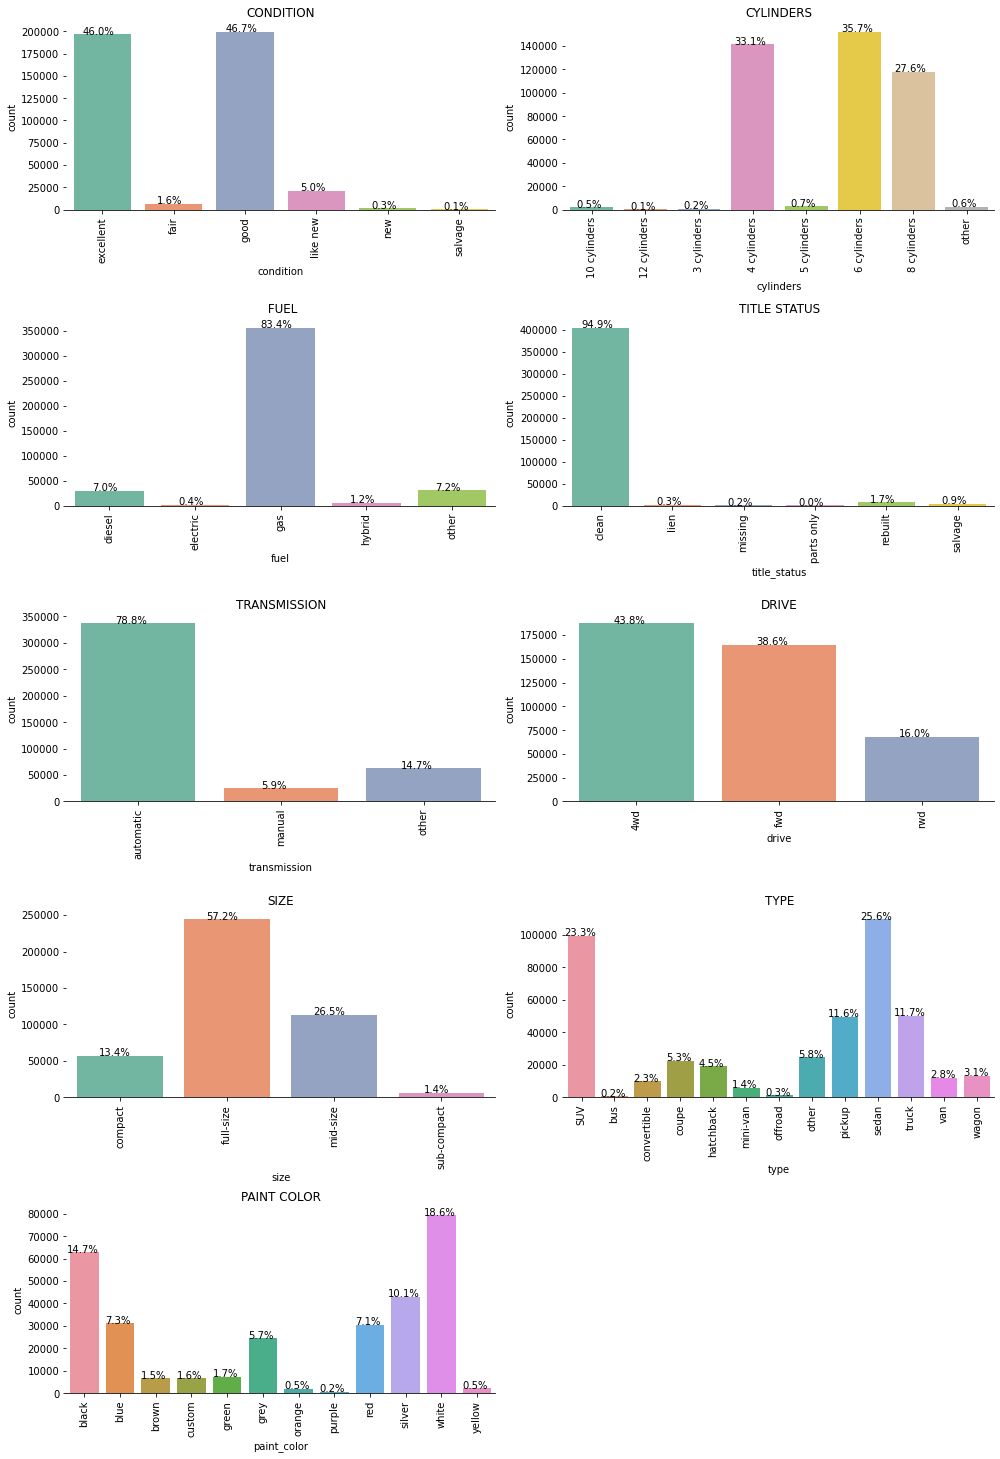

In [157]:
# Making a list of all categorical variables
cat_columns = ['condition','cylinders','fuel',
               'title_status','transmission','drive','size','type','paint_color']
title=['Condition','Cylinders',
       ' Fuel','Title Status',
       'Transmission','Drive','Size',"Type",'Paint Color']

plt.figure(figsize=(14,20))



for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df[variable], data=df)
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.xticks(rotation = 90)
                     plt.title(title[i].upper())


### Price and Transmission

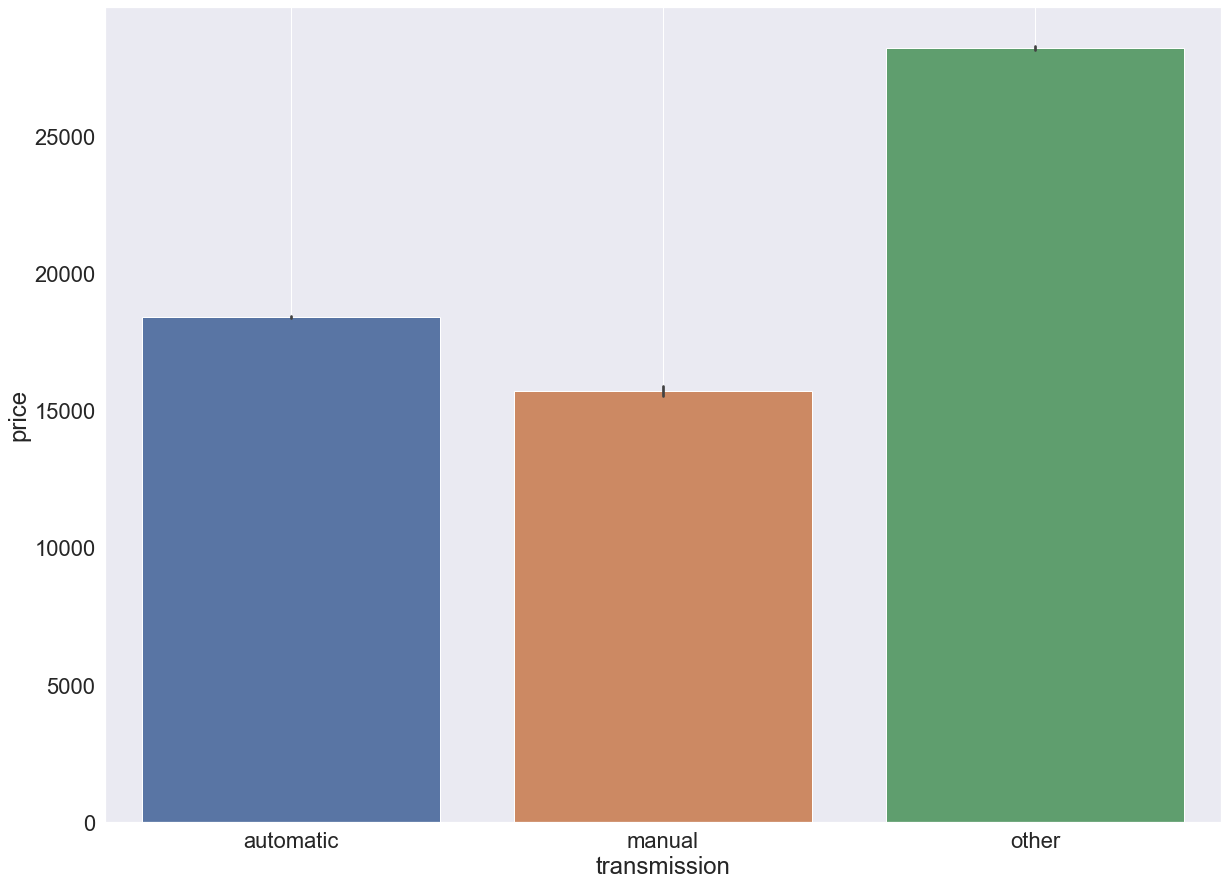

In [158]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='transmission', y='price', data=df)
plt.grid()

### Price and Drive

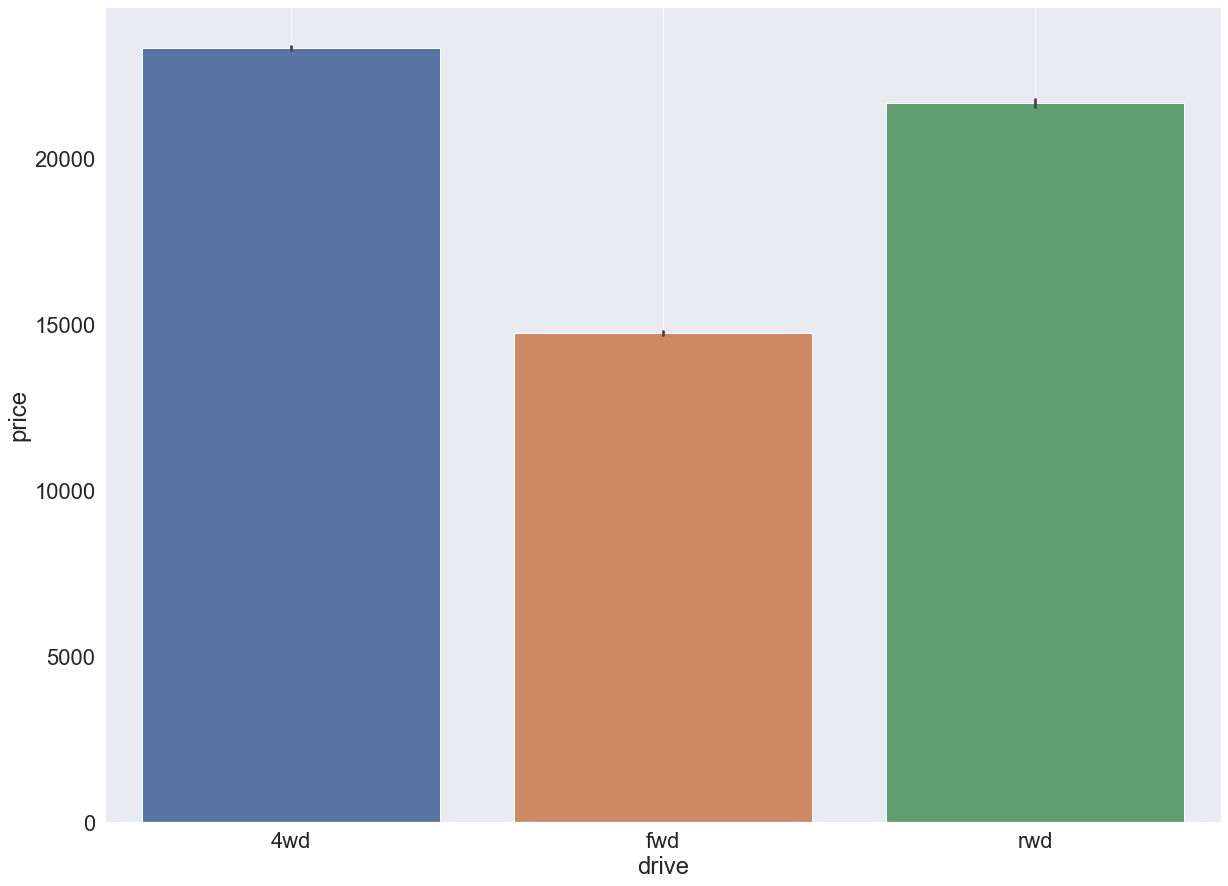

In [159]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='drive', y='price', data=df)
plt.grid()

### Price and Manufacturer

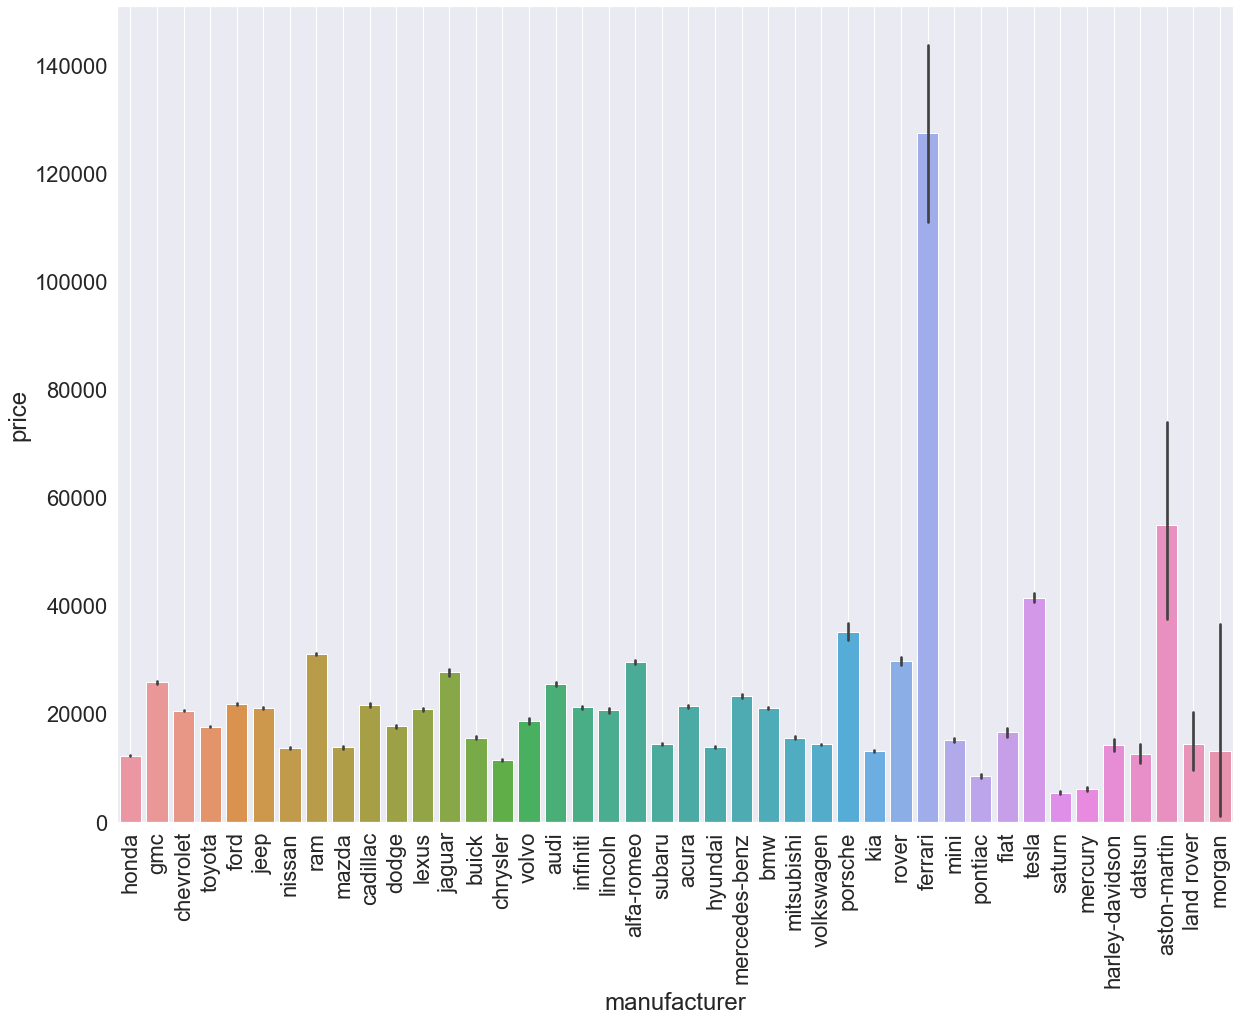

In [160]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='manufacturer', y='price', data=df)
plt.xticks(rotation = 90)
plt.grid()

### Year and price

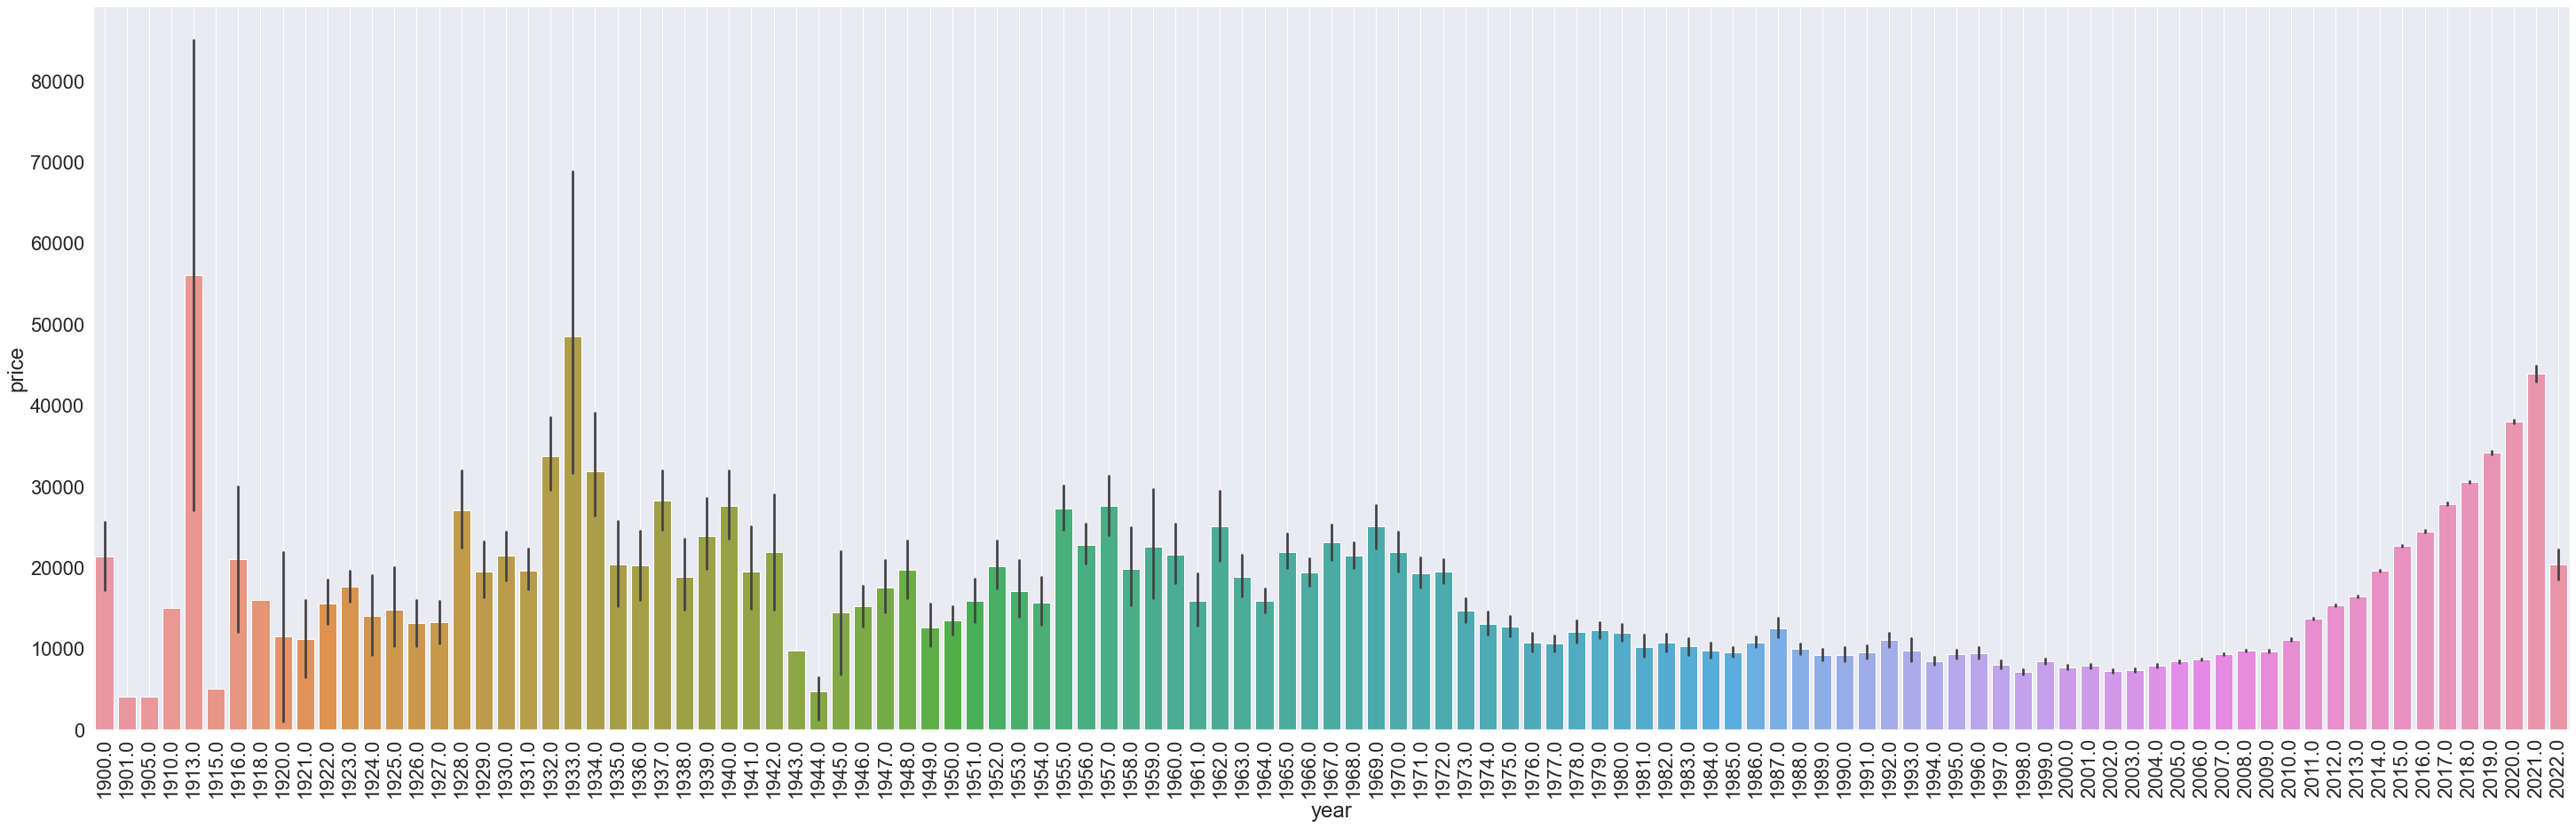

In [161]:
plt.figure(figsize=(50,15))
sns.set(font_scale=2)
sns.barplot(x='year', y='price', data=df)
plt.xticks(rotation = 90)
plt.grid()

### Paint color and price

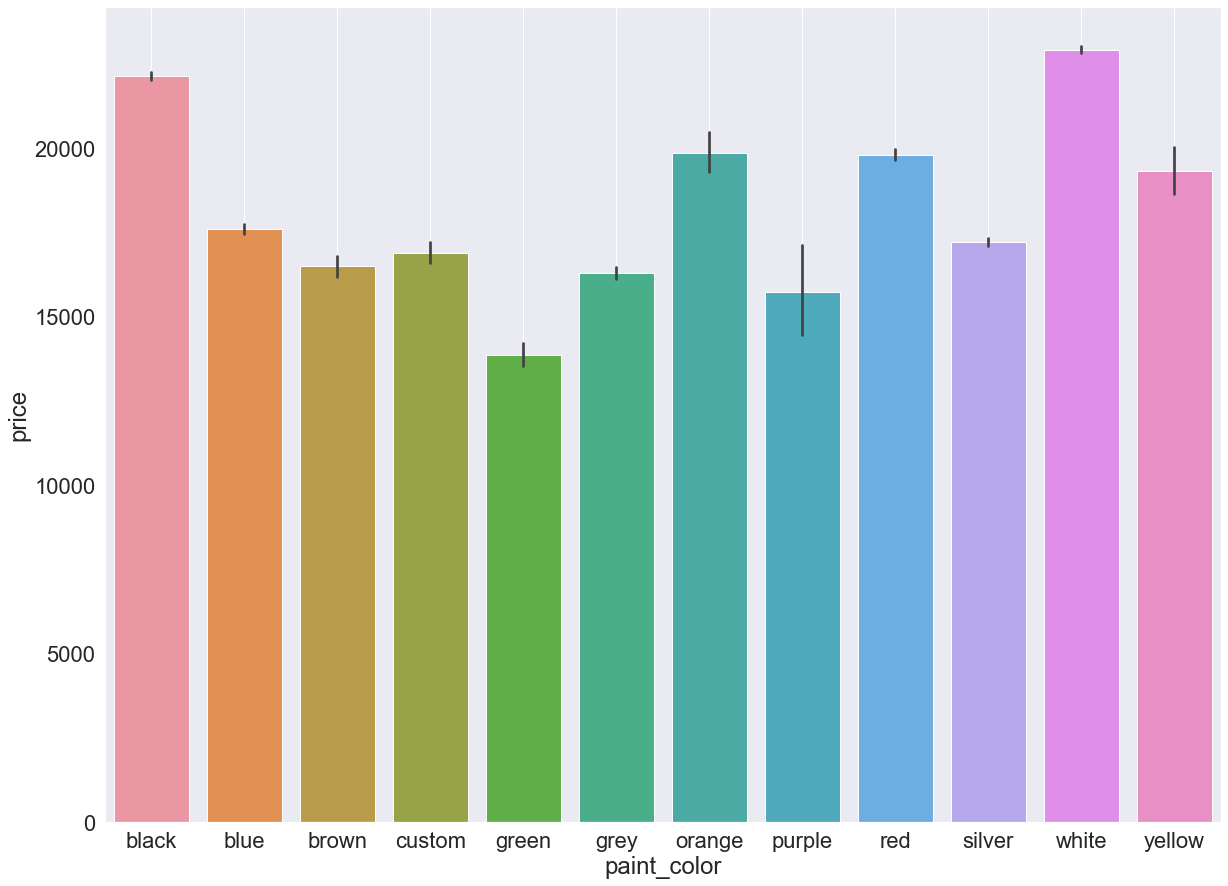

In [162]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='paint_color', y='price', data=df)
plt.grid()

### Type and price

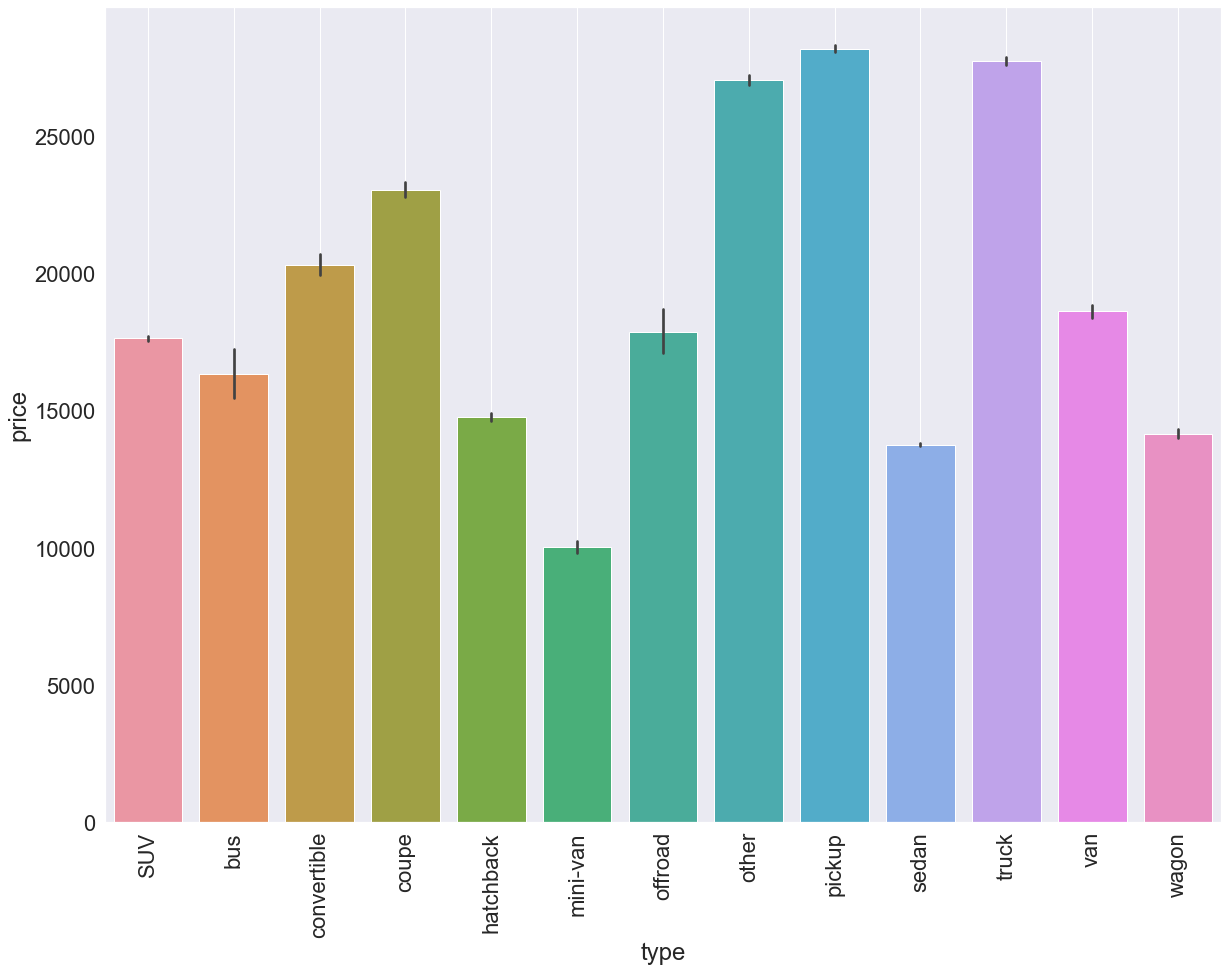

In [163]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='type', y='price', data=df)
plt.xticks(rotation = 90)
plt.grid()

### State and price

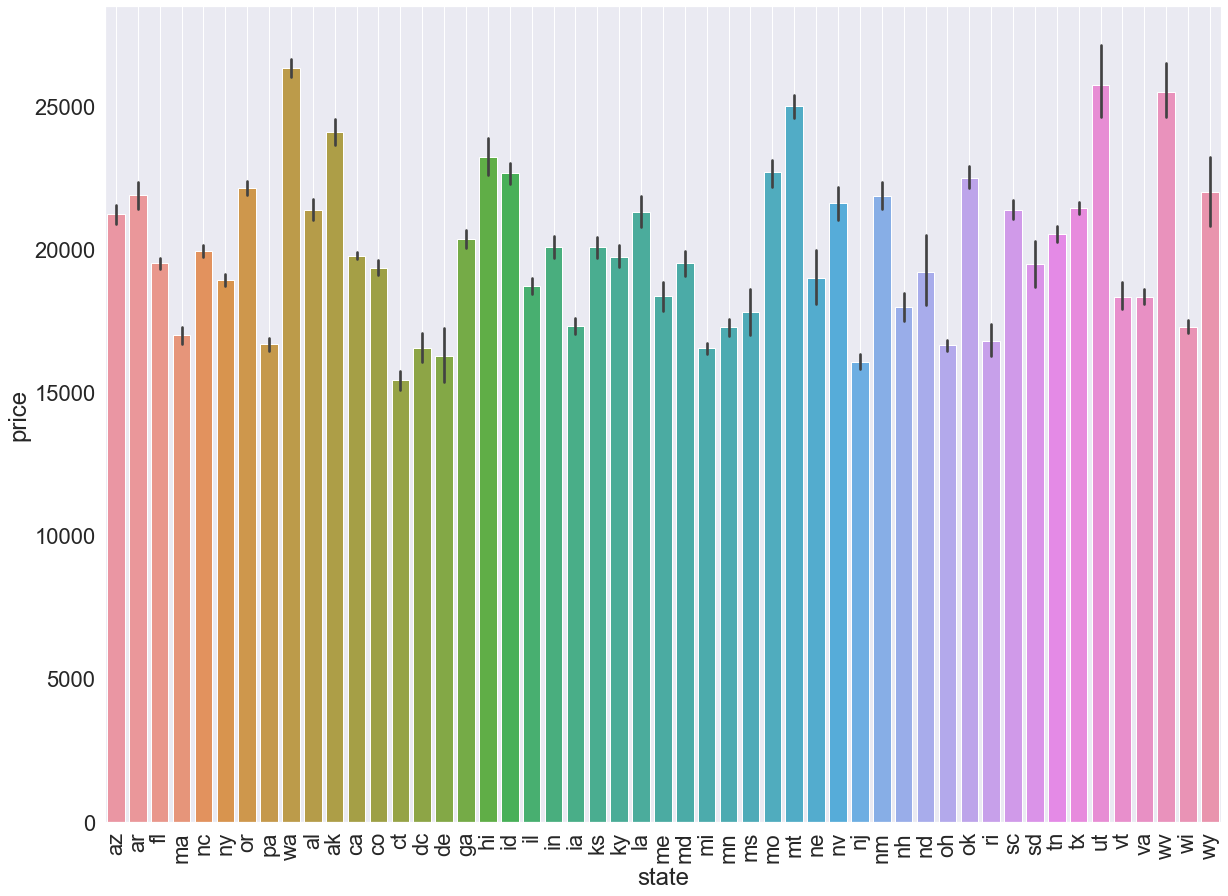

In [164]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='state', y='price', data=df)
plt.xticks(rotation = 90)
plt.grid()

### Manufacturer and price

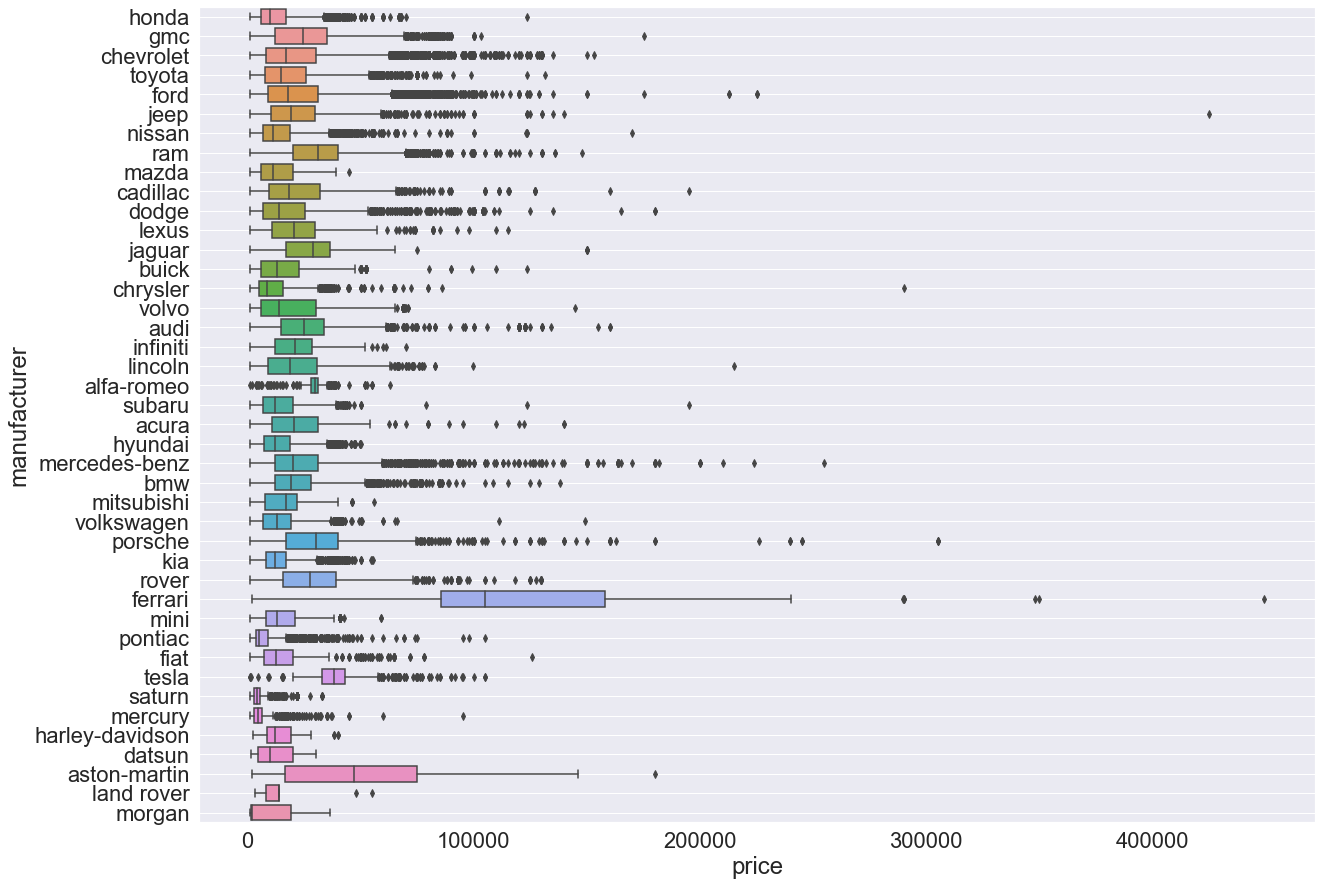

In [165]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='price', y='manufacturer', data=df)
plt.grid()

### Observations
- Over 90% of the cars in the dataset are in good to excellent condition with a clean title.
- Sedans make up 25% of the vehicles followed by SUV's at 22%.
- Ferrari's and Aston-Martins are the most expensive cars in the dataset which makes sense since their exotics brands.
- The most expensive cars were made in 1913 and 1933. These are most likely rare classic cars.
- Cars prices stay consistent from 1973 - 2009 and then begin to increase each year.
- Pick ups and trucks top the most expensive cars on the list while mini vans are the cheapest.
- Black and white are the most expensive colors, these are also the most common. What's also interesting is orange and yellow are also in the top colors. These are rare colors but mostly colors of exotics cars so the price makes sense.

### Answers to Initial questions
 - What factors affect used car prices? Drive, manufacturer, year, paint color.
 - Does color have any affect on price? Yes (see observation above).
 - Which manufacturers are the most expensive on the used car market? Ferrari, followed by Aston-Martin, Tesla, and Porsche.
 - Which model years are the most expensive? 1913 and 1933.
 - Does location effect price? Yes, used car prices are most expensive in Washington, Utah, and West Virginia. They are least 
   expensive in Connecticut, New Jersey, and Michigan.
 - Have overall prices increased in recent years? Yes, prices have been trending upward since 2009 - 2021.

### Based on knowledge of car prices. There looks to be some prices in the data that don't make sense.

### Inspect Jeep with a price over 400000.

In [302]:
df[df['price'] > 400000]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2
133497,7316029298,https://eastidaho.craigslist.org/cto/d/cheyenne-rock-crawler-yj-jeep/7316029298.html,east idaho,https://eastidaho.craigslist.org,425000.00000,1993.00000,jeep,WRANGLER,good,6 cylinders,...,full-size,convertible,red,https://images.craigslist.org/00G0G_9nDFY7IZij2z_0CI0t2_600x450.jpg,"1992 YJ wrangler. Custom build. This is a list of some of the main items: •\t5.3 LS1 ENG 4L60E TRANS 56,000 miles new water pump, new alternator, Howell computer reflash+ harness, LS1 Ron Davis radiator •\t3.8 ATLAS TRANFERCASE, Tom wood drive shafts all 1350 U joints •\tRear DIF 14 BOLT 5.13 Yukon Detroit Locker, Disc brake conversion, Motobilt truss (race version) •\tFront Dif Chevy Dana ...",id,41.14370,-104.79620,2021-05-02T19:22:13-0600,WRANGLER
328193,7303420900,https://altoona.craigslist.org/cto/d/revloc-buying-junk-unwanted-vehicles/7303420900.html,altoona-johnstown,https://altoona.craigslist.org,400123.00000,2003.00000,NaN,ANY AND ALL,fair,5 cylinders,...,full-size,pickup,blue,https://images.craigslist.org/00K0K_6R6GSZxFlnLz_0CI0t2_600x450.jpg,Buying Junk/Unwanted/Crashed Vehicles Cars-trucks-vans-suv's complete vehicles pay the most --$$ All makes and models--free towing-- Get cash for that old clunker--Rollback/Wrecker Service Also buying broke vehicles --years--2010-2019 that pay more then scrap of course--bad engine or transmission etc... calls and texts/email are welcome---- Ebensburg to cresson to somerset to indiana to c...,pa,40.48010,-78.72630,2021-04-07T19:49:49-0400,ANY
360604,7312429759,https://nashville.craigslist.org/ctd/d/murfreesboro-2019-ferrari-488-gtb-nav/7312429759.html,nashville,https://nashville.craigslist.org,449500.00000,2019.00000,ferrari,488 GTB,good,8 cylinders,...,mid-size,coupe,red,https://images.craigslist.org/00505_7HJDO2ebdsKz_0jm08W_600x450.jpg,"2019 Ferrari 488 GTB W/NAV Offered by: Auto Collection Of Murfreesboro — (615) 680-0586 — $449,500 Auto Collection Of Murfreesboro Year: 2019 Make: Ferrari Model: 488 GTB Series: W/NAV VIN: ZFF79ALA7K0248037 Stock #: 248037 Condition: Used Mileage: 500 MPG: 15 city / 22 highway Exterior: Red Interior: Blue Body: Coupe Transmission: 7-Speed Double Clutch ON LOT Financing Not ...",tn,35.84018,-86.38760,2021-04-25T13:17:40-0500,488


### Create a lookup for prices under 400000

In [303]:
df_price_lookup = df[df['price'] < 400000]

### Filter for Manufacturer, Type, and year that matches the Jeep with over 400k price

In [304]:
brand = df_price_lookup[(df_price_lookup['manufacturer'] == 'jeep')& (df_price_lookup['type'] == 'SUV') & (df_price_lookup['year']==1993)]

In [305]:
brand.groupby(['manufacturer','year','type'])['price'].median().sort_values()

manufacturer  year        type       
jeep          1993.00000  SUV           3937.50000
                          bus                  nan
                          convertible          nan
                          coupe                nan
                          hatchback            nan
                          mini-van             nan
                          offroad              nan
                          other                nan
                          pickup               nan
                          sedan                nan
                          truck                nan
                          van                  nan
                          wagon                nan
Name: price, dtype: float64

### Fill in with new Jeep price based on average.

In [306]:
df.loc[df['price'] == 425000, 'price'] = 3927

### Repeat above steps for Chrysler

In [307]:
df[(df['price'] > 250000) &(df['manufacturer'] == 'chrysler')]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2
373509,7303163871,https://elpaso.craigslist.org/cto/d/el-paso-handicap-accesible-and-drivable/7303163871.html,el paso,https://elpaso.craigslist.org,290000.00000,2012.00000,chrysler,TOWN & COUNTRY LIMITED,like new,6 cylinders,...,full-size,van,white,https://images.craigslist.org/00b0b_dl2EAE4rbMgz_0hq0d4_600x450.jpg,"Chrysler Town and Country handicap van 2012 with only 24K miles, very very well maintained in excellent condition, The ramp is under the floor and the van tilts while extending the access ramp. Wheel chair straps have been upgraded for maximum security. The driver seat can be moved backward and turns to give access to transfer from chair to driver seat. Hand controls are in place or ca...",tx,31.76740,-106.43040,2021-04-07T10:20:52-0600,TOWN


In [308]:
brand2 = df_price_lookup[(df_price_lookup['manufacturer'] == 'chrysler')& (df_price_lookup['type'] == 'van') & (df_price_lookup['year']==2012)]

In [309]:
brand2.groupby(['manufacturer','year','type'])['price'].median().sort_values()

manufacturer  year        type       
chrysler      2012.00000  van           7521.00000
                          SUV                  nan
                          bus                  nan
                          convertible          nan
                          coupe                nan
                          hatchback            nan
                          mini-van             nan
                          offroad              nan
                          other                nan
                          pickup               nan
                          sedan                nan
                          truck                nan
                          wagon                nan
Name: price, dtype: float64

In [310]:
df.loc[df['price'] == 290000, 'price'] = 7521

### Repeat Steps for Subaru

In [311]:
df[(df['price'] > 150000) & (df['manufacturer'] == 'subaru')]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2
201823,7310274400,https://grandrapids.craigslist.org/cto/d/jenison-subaru-wrx/7310274400.html,grand rapids,https://grandrapids.craigslist.org,195000.00000,2017.00000,subaru,WRX,like new,4 cylinders,...,full-size,sedan,grey,https://images.craigslist.org/00U0U_6CSzsikSSeUz_0t20CI_600x450.jpg,"Beautiful Wrx, clean no wrecks. Lots of exterior modifications with a sound system.",mi,42.91040,-85.82760,2021-04-21T09:26:53-0400,WRX


In [312]:
brand2 = df_price_lookup[(df_price_lookup['manufacturer'] == 'subaru')& (df_price_lookup['type'] == 'sedan') & (df_price_lookup['year']==2017)]

In [313]:
brand2.groupby(['manufacturer','year','type'])['price'].median().sort_values()

manufacturer  year        type       
subaru        2017.00000  sedan         19990.00000
                          SUV                   nan
                          bus                   nan
                          convertible           nan
                          coupe                 nan
                          hatchback             nan
                          mini-van              nan
                          offroad               nan
                          other                 nan
                          pickup                nan
                          truck                 nan
                          van                   nan
                          wagon                 nan
Name: price, dtype: float64

In [314]:
df.loc[df['price'] == 195000, 'price'] = 19990

### Check if Subaru price changed

In [315]:
df[(df['price'] > 150000) & (df['manufacturer'] == 'subaru')]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2


### Check if Chrysler price changed

In [316]:
df[(df['price'] > 200000) & (df['manufacturer'] == 'chrysler')]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2


### Repeat Above steps for Lincoln

In [326]:
brand3 = df_price_lookup[(df_price_lookup['manufacturer'] == 'lincoln')& (df_price_lookup['type'] == 'SUV') & (df_price_lookup['year']==2015)]

In [327]:
brand3.groupby(['manufacturer','year','type'])['price'].median().sort_values().round(2)

manufacturer  year        type       
lincoln       2015.00000  SUV           16995.00000
                          bus                   nan
                          convertible           nan
                          coupe                 nan
                          hatchback             nan
                          mini-van              nan
                          offroad               nan
                          other                 nan
                          pickup                nan
                          sedan                 nan
                          truck                 nan
                          van                   nan
                          wagon                 nan
Name: price, dtype: float64

In [328]:
df.loc[df['price'] == 215000, 'price'] = 16995

### Check if price changed

In [329]:
df[(df['price'] > 200000) & (df['manufacturer'] == 'lincoln')]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2


### Repeat above stepd for Ford

In [323]:
df[(df['price'] > 200000) & (df['manufacturer'] == 'ford')]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2
8495,7316221976,https://flagstaff.craigslist.org/cto/d/south-lyon-ford-vicky-vickey-1933-model/7316221976.html,flagstaff / sedona,https://flagstaff.craigslist.org,213000.00000,1933.00000,ford,2 DR VICTORIA,excellent,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00a0a_gXLnhluDbuwz_0hq08t_600x450.jpg,"1933 Ford Vicky Model2dr /Chrysler Conv - $212,999 ------------------------------------------------------------ 1933 Ford Victoria model Now it is Show and go time!!!!! 33 Ford Victoria Model Style 2 dr, 4 bucket seat Supershow car/ Classic.../ Hotrod Detroit auto show Riddled award car! Built prior to 2010 Michigan Autorama Auto show! Grade 8 /competitor. For Best of show.. 000000.6 /10s of...",az,42.45670,-83.65900,2021-05-03T08:36:58-0700,2
231895,7316240854,https://charlotte.craigslist.org/cto/d/south-lyon-ford-vicky-vickey-1933-model/7316240854.html,charlotte,https://charlotte.craigslist.org,213000.00000,1933.00000,ford,VICKEY COPY,like new,8 cylinders,...,full-size,NaN,NaN,https://images.craigslist.org/00a0a_gXLnhluDbuwz_0hq08t_600x450.jpg,"Posted less than a minute ago Ford vicky Vickey 1933 model 2 dr - $213,000 (SouthLyon MICHIGAN) 1933 Ford Vicky Model2dr /Chrysler Conv - $212,999 ------------------------------------------------------------ 1933 Ford Victoria model Now it is Show and go time!!!!! 33 Ford Victoria Model Style 2 dr, 4 bucket seat Supershow car/ Classic.../ Hotrod Detroit auto show Riddled award car! Built prio...",nc,42.45670,-83.65900,2021-05-03T12:05:49-0400,VICKEY
409529,7316352222,https://seattle.craigslist.org/see/cto/d/wenatchee-1969-ford-mustang-boss-429/7316352222.html,seattle-tacoma,https://seattle.craigslist.org,225000.00000,1969.00000,ford,MUSTANG,excellent,8 cylinders,...,compact,coupe,white,https://images.craigslist.org/00I0I_ga4jjFoQKEyz_0CI0sV_600x450.jpg,"1969 BOSS 429 MUSTANG KK#1401. Recent refresh on non-original period correct 1969 Daytona race version 429 S code type engine. Runs great and is a joy to drive ! Solid #2 car close to concourse with all appropriate parts. Top loader 4 speed transmission with 3.91 Detroit locker rear end. 33,000 documented original miles. Beautiful restoration including deluxe Marti report, original in...",wa,47.42530,-120.32730,2021-05-03T11:55:28-0700,MUSTANG
411065,7313852214,https://wenatchee.craigslist.org/cto/d/wenatchee-1969-ford-mustang-boss-429/7313852214.html,wenatchee,https://wenatchee.craigslist.org,225000.00000,1969.00000,ford,MUSTANG,excellent,8 cylinders,...,compact,coupe,white,https://images.craigslist.org/00I0I_ga4jjFoQKEyz_0CI0sV_600x450.jpg,"1969 Ford Mustang Boss 429. KK#1401. Recent refresh on non-original period correct 1969 Daytona race version 429 S code type engine. Runs great and is a joy to drive! Solid #2 car close to concourse with all appropriate parts. Top loader 4 speed transmission with 3.91 Detroit locker rear end. 33,000 documented original miles. Beautiful restoration including deluxe Marti report, original ...",wa,47.42530,-120.32730,2021-04-28T08:51:39-0700,MUSTANG


### The high priced Fords are classic cars so these prices look correct. We won't change.

### Repeat above steps for GMC

In [330]:
df[(df['price'] > 150000) & (df['manufacturer'] == 'gmc')]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2
178617,7313967990,https://maine.craigslist.org/cto/d/brunswick-2015-gmc-sierra-wd/7313967990.html,maine,https://maine.craigslist.org,175000.00000,2015.00000,gmc,SIERRA 1500,good,8 cylinders,...,full-size,truck,white,https://images.craigslist.org/00g0g_91zE4639JNiz_07K0ak_600x450.jpg,"2015 GMC Sierra 1500, 2WD, V8, 5.3L, Gas, Reg. Cab, Auto Trans, 8’ bed rhino-lined, A/C, P/W, P/L, P/S, Tilt, C/C; 144,100 Miles, Well maintained and very clean. $17,500 OBRO Can be seen at 37 Jordan Avenue, Brunswick. Call show contact info Mon – Fri 7AM -3PM With questions or to test drive.",me,43.91483,-69.95755,2021-04-28T14:55:48-0400,SIERRA


In [331]:
brand4 = df_price_lookup[(df_price_lookup['manufacturer'] == 'gmc')& (df_price_lookup['type'] == 'truck') & (df_price_lookup['year']==2015)]

In [332]:
brand4.groupby(['manufacturer','year','type'])['price'].median().sort_values()

manufacturer  year        type       
gmc           2015.00000  truck         31971.00000
                          SUV                   nan
                          bus                   nan
                          convertible           nan
                          coupe                 nan
                          hatchback             nan
                          mini-van              nan
                          offroad               nan
                          other                 nan
                          pickup                nan
                          sedan                 nan
                          van                   nan
                          wagon                 nan
Name: price, dtype: float64

In [333]:
df.loc[df['price'] == 175000, 'price'] = 31971

### Repeat above stepd for Volvo

In [335]:
df[(df['price'] > 100000) & (df['manufacturer'] == 'volvo')]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2
368720,7316942640,https://dallas.craigslist.org/dal/ctd/d/richardson-2013-volvo-s60t5-clean-title/7316942640.html,dallas / fort worth,https://dallas.craigslist.org,144832.00000,2013.00000,volvo,S60,good,5 cylinders,...,mid-size,sedan,black,https://images.craigslist.org/00e0e_3diN56oy0ccz_0CI0t2_600x450.jpg,"CALL OR TEXT FOR DETAILS AT 469-688-7700 www.achautohaus.com 2013 Volvo S60 T5 Miles: 144K, Clean Title, Non smoker interior, power windows, sunroof, leather seats, clean interior, power door locks and much more....Tires are in good condition. FOR MORE INFORMATION CALL OR TEXT:469-688-7700",tx,32.93223,-96.74589,2021-05-04T16:03:26-0500,S60


In [336]:
brand6 = df_price_lookup[(df_price_lookup['manufacturer'] == 'volvo')& (df_price_lookup['type'] == 'sedan') & (df_price_lookup['year']==2013)]

In [337]:
brand6.groupby(['manufacturer','year','type'])['price'].median().sort_values()

manufacturer  year        type       
volvo         2013.00000  sedan         10999.00000
                          SUV                   nan
                          bus                   nan
                          convertible           nan
                          coupe                 nan
                          hatchback             nan
                          mini-van              nan
                          offroad               nan
                          other                 nan
                          pickup                nan
                          truck                 nan
                          van                   nan
                          wagon                 nan
Name: price, dtype: float64

In [338]:
df.loc[df['price'] == 144832, 'price'] = 10999

### Check if price changed

In [339]:
df[(df['price'] > 100000) & (df['manufacturer'] == 'volvo')]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2


### Check if incorrect prices were removed

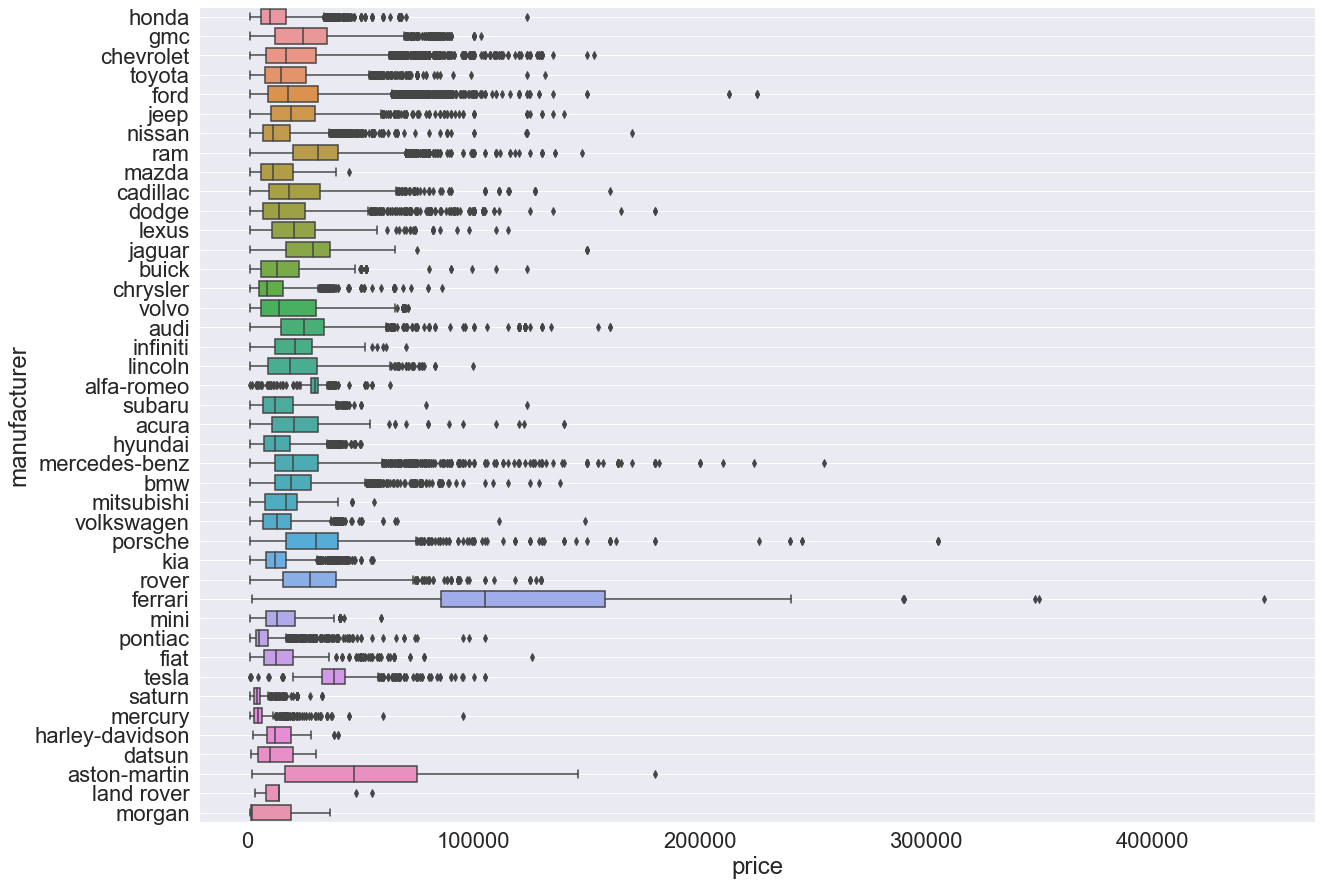

In [340]:
#Price and band 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='price', y='manufacturer', data=df)
plt.grid()

## Observations
- All outliers that were due to errors were dropped. 
- The remaining outliers in (Ford, Porsche, and Ferrari) are correct prices for those specific vehicles.

### Lets further investigate car prices under 2000

In [341]:
df[df['price'] <2000]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500.00000,nan,honda,NaN,NaN,6 cylinders,...,full-size,SUV,NaN,NaN,NaN,ma,nan,nan,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/westtown-2007-ford-150/7222379453.html,hudson valley,https://hudsonvalley.craigslist.org,1600.00000,nan,honda,NaN,NaN,6 cylinders,...,full-size,SUV,NaN,NaN,NaN,ny,nan,nan,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/westtown-silverado-2000/7221952215.html,hudson valley,https://hudsonvalley.craigslist.org,1000.00000,nan,honda,NaN,NaN,6 cylinders,...,full-size,SUV,NaN,NaN,NaN,ny,nan,nan,NaN,NaN
185,7316853268,https://bham.craigslist.org/cto/d/moody-1998-toyota-rav4-manual/7316853268.html,birmingham,https://bham.craigslist.org,1800.00000,1998.00000,toyota,RAV4,good,4 cylinders,...,mid-size,SUV,green,https://images.craigslist.org/00d0d_2JC9dIRE7c7z_0CI0pO_600x450.jpg,"my Japanese is a bit rusty, but i am pretty sure that the ""RAV"" in RAV4 means ""really awesome vehicle""! this car is just waiting for someone to take it on those unrealistic drives that you see in car commercials. yes, it has over 240k miles, but that just means that it's seen some things...it's walked the earth, met people, got into adventures...like Caine in Kung-fu! speaking of adventures...",al,33.60350,-86.46680,2021-05-04T13:30:58-0500,RAV4
210,7316643810,https://bham.craigslist.org/cto/d/birmingham-1969-mercedes-benz/7316643810.html,birmingham,https://bham.craigslist.org,1300.00000,1969.00000,mercedes-benz,BENZ,good,6 cylinders,...,full-size,coupe,NaN,https://images.craigslist.org/00T0T_KljAvpSDdbz_0CI0lM_600x450.jpg,Car has been sitting and everything is still original. Motor condition is not known. Carburetors are missing on the vehicle. Interior is in good condition. Call or text me show contact info .,al,33.52100,-86.80660,2021-05-04T07:10:04-0500,BENZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426558,7309055423,https://wyoming.craigslist.org/cto/d/loveland-1999-volvo-s70-awd/7309055423.html,wyoming,https://wyoming.craigslist.org,1200.00000,1999.00000,volvo,S70,fair,4 cylinders,...,mid-size,sedan,silver,https://images.craigslist.org/00X0X_h0nnupImJo4z_0xr0iO_600x450.jpg,"1999 Volvo S70 AWD Sedan 4D MileageEdit 253000 FeaturesEdit Drive: AWD Transmission: Automatic Engine: 5-Cyl, Turbo, 2.4 Liter Options/EquipmentEdit Traction Control ABS (4-Wheel) Air Conditioning Power Windows Power Door Locks Cruise Control Power Steering Telescoping Wheel AM/FM Stereo Cassette Dual Air Bags F&R Side Air Bags Power Seat Heated front Seats Alloy Wheels This is such a great...",wy,40.45864,-105.08440,2021-04-18T19:57:35-0600,S70
426564,7308976329,https://wyoming.craigslist.org/cto/d/saint-stephens-chevy-x4-riverton/7308976329.html,wyoming,https://wyoming.craigslist.org,1500.00000,1989.00000,chevrolet,SILVERADO 1500,good,8 cylinders,...,compact,pickup,NaN,https://images.craigslist.org/00I0I_6n47G9SDGeoz_09G07g_600x450.jpg,The man that owns this truck made a deal with my wife to meet her with this truck Friday night in Casper. Well that all changed his wife wasn't home he didn't have a way to get home. So we drove 3.5 hours for him to say it was too late when he knew we were on the way. Only 45 minutes away from his house. So we made a deal to come pick it up today. Well since he agreed to meet us with the truck...,wy,43.03510,-108.20240,2021-04-18T16:24:38-0600,SILVERADO
426644,7307051186,https://wyoming.craigslist.org/cto/d/wheatland-1998-dodge-1500-quad-cab-4x4/7307051186.html,wyoming,https://wyoming.craigslist.org,1600.00000,1998.00000,ram,1500,fair,8 cylinders,...,full-size,pickup,NaN,https://images.craigslist.org/00g0g_aWlZKI3c7c0z_0CI0t2_600x450.

### After investigating the model names in the list above we can see a model named called "Special finance program 2020". This looks like a promotion rather than a model name.

In [343]:
df[df['model'] == 'SPECIAL FINANCE PROGRAM 2020']

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2
255,7316156727,https://bham.craigslist.org/ctd/d/clanton-we-are-essential-for-those-who/7316156727.html,birmingham,https://bham.craigslist.org,1000.00000,2021.00000,buick,SPECIAL FINANCE PROGRAM 2020,fair,other,...,full-size,bus,green,https://images.craigslist.org/00n0n_5VG28y2JRQ1_600x450.jpg,WE ARE GOING THROUGH A VERY UNCERTAIN TIME WITH THE CORONA VIRUS GOING AROUND. WE ARE PRACTICING SOCIAL DISTANCING EVERY DAY AT MY DEALERSHIP AND WE ARE STILL SELLING AND SERVICING VEHICLES. WE WELCOME PEOPLE HERE WEARING MASK AND DOING EVERYTHING POSSIBLE TO BE SAFE. WE ARE KEEPING ALL CONTACTS DURING THE SELLING PROCESS TO A MINIMUM TO ENSURE YOUR SAFETY . WE ARE CLEANING THE ENTIRE CUSTOMER...,al,32.92290,-86.54500,2021-05-03T08:44:39-0500,SPECIAL
345,7315262722,https://bham.craigslist.org/ctd/d/clanton-we-are-essential-for-those-who/7315262722.html,birmingham,https://bham.craigslist.org,1000.00000,2021.00000,buick,SPECIAL FINANCE PROGRAM 2020,fair,other,...,full-size,bus,green,https://images.craigslist.org/00n0n_5VG28y2JRQ1_600x450.jpg,WE ARE GOING THROUGH A VERY UNCERTAIN TIME WITH THE CORONA VIRUS GOING AROUND. WE ARE PRACTICING SOCIAL DISTANCING EVERY DAY AT MY DEALERSHIP AND WE ARE STILL SELLING AND SERVICING VEHICLES. WE WELCOME PEOPLE HERE WEARING MASK AND DOING EVERYTHING POSSIBLE TO BE SAFE. WE ARE KEEPING ALL CONTACTS DURING THE SELLING PROCESS TO A MINIMUM TO ENSURE YOUR SAFETY . WE ARE CLEANING THE ENTIRE CUSTOMER...,al,32.92290,-86.54500,2021-05-01T08:54:37-0500,SPECIAL
386,7314779644,https://bham.craigslist.org/ctd/d/clanton-we-are-essential-for-those-who/7314779644.html,birmingham,https://bham.craigslist.org,1000.00000,2021.00000,buick,SPECIAL FINANCE PROGRAM 2020,fair,other,...,full-size,bus,green,https://images.craigslist.org/00F0F_dROjQK9UCaP_600x450.jpg,WE ARE GOING THROUGH A VERY UNCERTAIN TIME WITH THE CORONA VIRUS GOING AROUND. WE ARE PRACTICING SOCIAL DISTANCING EVERY DAY AT MY DEALERSHIP AND WE ARE STILL SELLING AND SERVICING VEHICLES. WE WELCOME PEOPLE HERE WEARING MASK AND DOING EVERYTHING POSSIBLE TO BE SAFE. WE ARE KEEPING ALL CONTACTS DURING THE SELLING PROCESS TO A MINIMUM TO ENSURE YOUR SAFETY . WE ARE CLEANING THE ENTIRE CUSTOMER...,al,32.92290,-86.54500,2021-04-30T09:11:55-0500,SPECIAL
448,7314275443,https://bham.craigslist.org/ctd/d/clanton-we-are-essential-for-those-who/7314275443.html,birmingham,https://bham.craigslist.org,1000.00000,2021.00000,buick,SPECIAL FINANCE PROGRAM 2020,fair,other,...,full-size,bus,green,https://images.craigslist.org/00404_ldZsjg8dO79_600x450.jpg,WE ARE GOING THROUGH A VERY UNCERTAIN TIME WITH THE CORONA VIRUS GOING AROUND. WE ARE PRACTICING SOCIAL DISTANCING EVERY DAY AT MY DEALERSHIP AND WE ARE STILL SELLING AND SERVICING VEHICLES. WE WELCOME PEOPLE HERE WEARING MASK AND DOING EVERYTHING POSSIBLE TO BE SAFE. WE ARE KEEPING ALL CONTACTS DURING THE SELLING PROCESS TO A MINIMUM TO ENSURE YOUR SAFETY . WE ARE CLEANING THE ENTIRE CUSTOMER...,al,32.92290,-86.54500,2021-04-29T08:47:14-0500,SPECIAL
492,7313833229,https://bham.craigslist.org/ctd/d/clanton-we-are-essential-for-those-who/7313833229.html,birmingham,https://bham.craigslist.org,1000.00000,2021.00000,buick,SPECIAL FINANCE PROGRAM 2020,fair,other,...,full-size,bus,green,https://images.craigslist.org/00P0P_3GQLvNK64Mw_600x450.jpg,WE ARE GOING THROUGH A VERY UNCERTAIN TIME WITH THE CORONA VIRUS GOING AROUND. WE ARE PRACTICING SOCIAL DISTANCING EVERY DAY AT MY DEALERSHIP AND WE ARE STILL SELLING AND SERVICING VEHICLES. WE WELCOME PEOPLE HERE WEARING MASK AND DOING EVERYTHING POSSIBLE TO BE SAFE. WE ARE KEEPING ALL CONTACTS DURING THE SELLING PROCESS TO A MINIMUM TO ENSURE YOUR SAFETY . WE ARE CLEANING THE ENTIRE CUSTOMER...,al,32.92290,-86.54500,2021-04-28T10:20:32-0500,SPECIAL
579,7313295607,https://bham.craigslist.org/ctd/d/clanton-we-are-essential-for-those-who/731

### Lets remove these

In [344]:
df.shape

(426826, 25)

In [345]:
df = df[df['model'].str.contains('SPECIAL FINANCE PROGRAM')==False]

In [346]:
df.shape

(421538, 25)

### I also noticed a model name "Special Finance Program". Lets remove this as well.

In [347]:
df[df['model'] == 'BUY HERE PAY HERE']

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2
121366,7316814170,https://atlanta.craigslist.org/atl/ctd/d/tucker-all-credit-approved-loans-drive/7316814170.html,atlanta,https://atlanta.craigslist.org,40975.00000,2021.00000,NaN,BUY HERE PAY HERE,excellent,12 cylinders,...,full-size,SUV,NaN,https://images.craigslist.org/00p0p_hdKdWhYbrTTz_0CI0t2_600x450.jpg,"**GUARANTEED FINANCING WITH DOWN PAYMENT!! CASH APPROVES ALL CREDIT YOUR ONE STOP DEALER, WE HAVE OVER 300 VEHICLES IN STOCK. ADVERTISED PRICE IS THE DOWN PAYMENT. WE FINANCE BUY HERE PAY HERE WITH GUARENTEED APPROVALS. YOU WILL RIDE TODAY 100% CALL 770-885-2644 ASK FOR STEVEN. BUSINESS HOUR: MONDAY - SATURDAY 9AM - 7PM THIS CAR RUNS AND DRIVES GREAT CALL TODAY TO SCHEDULE A TEST DRIVE!! F...",ga,33.85700,-84.21600,2021-05-04T13:30:17-0400,BUY
122319,7315970679,https://atlanta.craigslist.org/atl/ctd/d/stone-mountain-100-approved-buy-here/7315970679.html,atlanta,https://atlanta.craigslist.org,40975.00000,2021.00000,NaN,BUY HERE PAY HERE,new,12 cylinders,...,full-size,SUV,yellow,https://images.craigslist.org/00P0P_8gki5BKWHwQz_0CI0t2_600x450.jpg,"**GUARANTEED FINANCING WITH DOWN PAYMENT!! YOUR ONE STOP DEALER, WE HAVE OVER 300 VEHICLES IN STOCK. ADVERTISED PRICE IS THE DOWN PAYMENT. WE FINANCE BUY HERE PAY HERE WITH GUARENTEED APPROVALS. YOU WILL RIDE TODAY 100% CALL 770-885-2644 ASK FOR STEVEN. BUSINESS HOUR: MONDAY - SATURDAY 9AM - 7PM THIS CAR RUNS AND DRIVES GREAT CALL TODAY TO SCHEDULE A TEST DRIVE!! FINANCE REQUIREMENTS: -GEOR...",ga,33.84731,-84.22508,2021-05-02T18:40:38-0400,BUY
142783,7314100140,https://chicago.craigslist.org/chc/ctd/d/chicago-if-you-really-need-car-but-dont/7314100140.html,chicago,https://chicago.craigslist.org,1000.00000,2012.00000,NaN,BUY HERE PAY HERE,excellent,12 cylinders,...,full-size,SUV,NaN,https://images.craigslist.org/01616_izARmIYOPdDz_0kE0fu_600x450.jpg,"LOOK NO BS, I DONT WANT TO WASTE YOUR TIME OR MY TIME, GIVE ME A CALL TO SEE IF I CAN WORK WITH YOU, IF I CANT ILL LET YOU KNOW UPFRONT ! Call (or text) CARLOS (773) 837-2781🚨 🚨 We Help People With The Following: * Discharged bankruptcy * Repos * Short Job Time (MINIMUM 3 MONTHS) * Cash jobs (FORMAL JOB LETTER) * NO CREDIT * Terrible Credit * No Co-Signer WHY BUY WITH US * Quick & EZ Approva...",il,41.94693,-87.74706,2021-04-28T18:11:01-0500,BUY
236700,7316181712,https://greensboro.craigslist.org/ctd/d/high-point-1000-down-bad-credit-buy/7316181712.html,greensboro,https://greensboro.craigslist.org,7995.00000,2009.00000,NaN,BUY HERE PAY HERE,like new,12 cylinders,...,full-size,SUV,NaN,https://images.craigslist.org/00W0W_jkClphyfhv2_600x450.jpg,BAD CREDIT?...OK.... BUY HERE PAY HERE!! $1000 DOWN!!! 336-207-8109 **LOW CREDIT SCORE?...OK!!! **REPO?...OK!!! **HOSPITAL BILLS?...OK!!! **STUDENT LOANS?...OK!!! DO YOU MAKE $350.00 A WEEK BEFORE TAXES?.. APPROVALS BASED ON INCOME!!!... BUY HERE PAY HERE!!...WE ARE THE BANK!!!*** ARE YOU BEING TOLD NO BY OTHER DEALERS?.CALL SEAN NOW!! 336-207-8109 **OVER 40 CARS TO CHOOSE FROM DAILY!!! CALL...,nc,36.00360,-80.00360,2021-05-03T10:31:00-0400,BUY
236988,7314259985,https://greensboro.craigslist.org/ctd/d/high-point-1000-down-bad-credit-buy/7314259985.html,greensboro,https://greensboro.craigslist.org,7995.00000,2009.00000,NaN,BUY HERE PAY HERE,like new,12 cylinders,...,full-size,SUV,NaN,https://images.craigslist.org/00W0W_jkClphyfhv2_600x450.jpg,BAD CREDIT?...OK.... BUY HERE PAY HERE!! $1000 DOWN!!! 336-207-8109 **LOW CREDIT SCORE?...OK!!! **REPO?...OK!!! **HOSPITAL BILLS?...OK!!! **STUDENT LOANS?...OK!!! DO YOU MAKE $350.00 A WEEK BEFORE TAXES?.. APPROVALS BASED ON INCOME!!!... BUY HERE PAY HERE!!...WE ARE THE BANK!!!*** ARE YOU BEING TOLD NO BY OTHER DEALERS?.CALL SEAN NOW!! 336-207-8109 **OVER 40 CARS TO CHOOSE FROM DAILY!!! CALL...,nc,36.00360,-80.00360,2021-04-29T09:10:02-0400,BUY
237062,7313789216,https://greensboro.craigslist.org/ctd/d/h

In [348]:
df = df[df['model'].str.contains('BUY HERE PAY HERE')==False]

In [349]:
df[df['model'] == 'BUY HERE PAY HERE']

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2


In [350]:
df = df.drop(df[df['model'].isna()].index)

In [351]:
df.shape

(421486, 25)

In [352]:
df.to_csv(r'C:\Users\Nick\Desktop\df_model1.csv')
print('done')

done


In [353]:
df_ml = pd.read_csv(r'C:\Users\Nick\Desktop\df_model1.csv')
print('done')

done


### Lets build a model to predict used car prices

In [354]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421486 entries, 0 to 421485
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421486 non-null  int64  
 1   id            421486 non-null  int64  
 2   url           421486 non-null  object 
 3   region        421486 non-null  object 
 4   region_url    421486 non-null  object 
 5   price         421486 non-null  float64
 6   year          420381 non-null  float64
 7   manufacturer  411628 non-null  object 
 8   model         421485 non-null  object 
 9   condition     420380 non-null  object 
 10  cylinders     415028 non-null  object 
 11  fuel          418544 non-null  object 
 12  odometer      417181 non-null  float64
 13  title_status  413345 non-null  object 
 14  transmission  419026 non-null  object 
 15  drive         414815 non-null  object 
 16  size          414824 non-null  object 
 17  type          412028 non-null  object 
 18  pain

In [355]:
df_ml.shape

(421486, 26)

### Confirm there's no duplicates

In [356]:
df_ml =df_ml.drop_duplicates()

In [358]:
df_ml.shape

(421486, 26)

### Remove outliers to maximize model results

In [359]:
max_threshold = df_ml['price'].quantile(0.95)

In [360]:
df_ml[df_ml['price'] > max_threshold]

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2
129,158,7302537532,https://auburn.craigslist.org/ctd/d/auburn-university-2020-jag-jaguar-epace/7302537532.html,auburn,https://auburn.craigslist.org,52990.00000,2020.00000,jaguar,E-PACE P300 R-DYNAMIC SE,good,...,full-size,other,white,https://images.craigslist.org/00p0p_4qfF2tImVZEz_0gw0co_600x450.jpg,"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can ...",al,32.59000,-85.48000,2021-04-06T08:24:50-0500,E-PACE
175,204,7316691442,https://bham.craigslist.org/ctd/d/tuscaloosa-2019-gmc-sierra-3500-denali/7316691442.html,birmingham,https://bham.craigslist.org,58977.00000,2019.00000,gmc,SIERRA 3500,good,...,full-size,truck,white,https://images.craigslist.org/01717_6QaVsXDoRuKz_09Q07v_600x450.jpg,"Contemporary Automotive address: 3427 Skyland Blvd East Tuscaloosa AL, 35405phone: ☎ (205) 386-8045 ext 31text: Text 31 to (205) 386-8045 for more details link: https://12284.dealerresources.net/l/43980884/2/22312140/31 contact: Keith Vandiver 2019 GMC SIERRA 3500 DENALI Vehicle InfoStock #: 84860VIN: 1GT42WEY6KF184860Condition: UsedOdometer: 66368Fuel Efficiency: 0/...",al,33.16832,-87.49190,2021-05-04T09:11:35-0500,SIERRA
191,220,7316423933,https://bham.craigslist.org/ctd/d/tampa-2006-sterling-acterra-grapple/7316423933.html,birmingham,https://bham.craigslist.org,53000.00000,2006.00000,ford,STERLING ACTERRA,excellent,...,full-size,truck,NaN,https://images.craigslist.org/00S0S_edOenFiO5gSz_0dq0t2_600x450.jpg,"2006 STERLING ACTERRA GRAPPLE TRUCK PAC-MAC LOADER SOUTHERN TRUCK AUTOMATIC and A/C 33,000 GVW- AIR-BRAKES 18’ DUMP BODY WITH NEW PAINT 6.4 TURBO- DIESEL EX-CITY OWNED 33,000 GVW 160,322 MILES $53,000 CALL RON @ 813-503-5693 in TAMPA, FLORIDA FOR FINANCING, CALL GENE TORRES/CT FINANCIAL SERVICES, LLC @ (561)703-0886 GMC FORD CHEVY DUMP CHIPPER FLORIDA CRANE TRUCK INTERNATIONAL FR...",al,28.00910,-82.50340,2021-05-03T15:54:00-0500,STERLING
210,239,7316237340,https://bham.craigslist.org/ctd/d/de-armanville-2019-chevrolet-silverado/7316237340.html,birmingham,https://bham.craigslist.org,45995.00000,2019.00000,chevrolet,SILVERADO 1500,excellent,...,full-size,truck,red,https://images.craigslist.org/00V0V_aLHp0BZn7J8z_0hk0co_600x450.jpg,"2019 Chevrolet Silverado 1500 by Benton Nissan of Oxford Stock# N0276 Call now to get a great deal!! 256-676-9717 Visit link for full details & price quote: http://sale.proauto-login.com/ref/309/139-2019-Chevrolet-Silverado-1500-2CDc0-412597 DESCRIPTION: 8-Speed Automatic, 4WD, Gideon/Very Dark Atmosphere Leather.Our mission is to sell quality vehicles and products with unwavering commi...",al,33.61409,-85.79673,2021-05-03T11:00:41-0500,SILVERADO
214,243,7316206718,https://bham.craigslist.org/ctd/d/new-castle-2017-maserati-levante-30l/7316206718.html,birmingham,https://bham.craigslist.org,45900.00000,2017.00000,NaN,MASERATI LEVANTE,good,...,mid-size,SUV,white,https://images.craigslist.org/00G0G_f8kyvPqqhiPz_0kE0dM_600x450.jpg,"2017 *Maserati* *Levante* 3.0L SUV - $45,900Call or Text Us Today! 205-612-0040Maserati_ Levante_ For Sale by World Class MotorsFor Financing - step 1 is to complete our short online application @ WorldClassApproval.com Vehicle Description For This *Maserati* *Levante*Like brand NEW 1-Owner 2017 Maserati Levante AWD with just 36K miles! Clean Carfax. Still covered under bumper to bumper fa...",al,33.66960,-86.81762,2021-05-03T10:12:44-0500,MASERATI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421443,426837,7302284209,https://wyoming.craigslist.org/c

In [363]:
min_threshold = df_ml['price'].quantile(0.05)
min_threshold

3300.0

In [364]:
df_ml[df_ml['price'] < min_threshold]

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,Model2
59,86,7310644616,https://auburn.craigslist.org/cto/d/auburn-chrysler-town-country/7310644616.html,auburn,https://auburn.craigslist.org,3000.00000,2004.00000,chrysler,TOWN & COUNTRY,good,...,mid-size,mini-van,silver,https://images.craigslist.org/00w0w_fF0N3jP3NHaz_0ww0oo_600x450.jpg,"2004 Chrysler Town & Country Touring. Seats 7. 3.8 L V6. A/C. Removable captain seats in middle and rear. Left and right sliding side doors, electronic controls. Audio/video system includes AM/FM CD, 6 CD/DVD changer, DVD with wireless headphones so children can watch a movie while driver listens to radio. Audio controls and cruise control on steering wheel so driver can keep eyes on road. S...",al,32.62941,-85.48445,2021-04-21T19:26:56-0500,TOWN
68,95,7309798041,https://auburn.craigslist.org/cto/d/auburn-2006-subaru-impreza-hatchback/7309798041.html,auburn,https://auburn.craigslist.org,2100.00000,2006.00000,subaru,IMPREZA,fair,...,compact,hatchback,NaN,https://images.craigslist.org/00606_6sZwmmrJ9rKz_0lM0t2_600x450.jpg,"Looking to sell my 2006 Subaru Impreza hatchback. The good: engines only got 97,000 miles on it, runs strong, shifts great, steerings tight, has new plugs, wires, and coil pack, good tires (bought new a few years ago and have put low miles on them), and interior is in great shape. The bad: its a northeast car and has rust on the rear wheel wells and underside of the car, has typical dings an...",al,32.54750,-85.46820,2021-04-20T09:55:48-0500,IMPREZA
108,137,7305082143,https://auburn.craigslist.org/cto/d/tuskegee-institute-1966-chevy-30-ton/7305082143.html,auburn,https://auburn.craigslist.org,2500.00000,1966.00000,NaN,1966 C-30 1 TON,good,...,full-size,pickup,brown,https://images.craigslist.org/00k0k_fmcpYCNBUGfz_0i30CI_600x450.jpg,Great Chevy Barn Find Great candidate for restoration. Complete with all original drivetrain. Truck has been stored for a long period of time . It will need to be serviced . It ran prior to being stored away. Will deliver for fuel and expenses. Southern Truck Will make and outstanding restoration project. Email for questions or further details . Thank you,al,32.41690,-85.70940,2021-04-11T07:07:52-0500,1966
156,185,7316853268,https://bham.craigslist.org/cto/d/moody-1998-toyota-rav4-manual/7316853268.html,birmingham,https://bham.craigslist.org,1800.00000,1998.00000,toyota,RAV4,good,...,mid-size,SUV,green,https://images.craigslist.org/00d0d_2JC9dIRE7c7z_0CI0pO_600x450.jpg,"my Japanese is a bit rusty, but i am pretty sure that the ""RAV"" in RAV4 means ""really awesome vehicle""! this car is just waiting for someone to take it on those unrealistic drives that you see in car commercials. yes, it has over 240k miles, but that just means that it's seen some things...it's walked the earth, met people, got into adventures...like Caine in Kung-fu! speaking of adventures...",al,33.60350,-86.46680,2021-05-04T13:30:58-0500,RAV4
167,196,7316707537,https://bham.craigslist.org/cto/d/temple-2005-ford-focus/7316707537.html,birmingham,https://bham.craigslist.org,3200.00000,2005.00000,ford,FOCUS,good,...,mid-size,sedan,NaN,https://images.craigslist.org/00z0z_aGtvSEKDcGCz_0CI0t2_600x450.jpg,"2005 Ford Focus 189k miles Automatic transmission run and drive good Recent oil change,transmission fluid services on time,good brakes/rotors,4 good tires, Power windows,factory CD player Cold air,heat works great, No mechanical or electrical issues. Clean title,very reliable car. Cash sale car no payment serious buyer only $3200 God Bless. 47zero55seven585six Keith",al,33.76770,-85.01330,2021-05-04T09:40:59-0500,FOCUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421251,426644,7307051186,https://wyoming.craigslist.org/cto/d/wheatland-1998-dodge-1500-quad-cab-4x4/7307051186.html,wyoming,https://wyoming.craigslist.org,1600.00000,1998.00000,r

In [365]:
df_ml.shape

(421486, 26)

### Remove outliers

In [366]:
df_ml = df_ml[(df_ml['price'] < max_threshold) & (df_ml['price'] > min_threshold)]

In [367]:
df_ml.shape

(379066, 26)

In [368]:
df_ml.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'Model2'],
      dtype='object')

### Lets create a new dataframe with only relevant columns we will use to build our model

In [369]:
df_ml = df_ml.filter(['Model2','year','manufacturer','condition','cylinder','fuel','odometer','transmission','drive','size','type','state','price'], axis = 1)

In [370]:
df_ml.head()

,Model2,year,manufacturer,condition,fuel,odometer,transmission,drive,size,type,state,price
0,SIERRA,2014.00000,gmc,good,gas,57923.00000,other,4wd,full-size,pickup,al,33590.00000
1,SILVERADO,2010.00000,chevrolet,good,gas,71229.00000,other,4wd,full-size,pickup,al,22590.00000
2,SILVERADO,2020.00000,chevrolet,good,gas,19160.00000,other,4wd,full-size,pickup,al,39590.00000
3,TUNDRA,2017.00000,toyota,good,gas,41124.00000,other,4wd,full-size,pickup,al,30990.00000
4,F-150,2013.00000,ford,excellent,gas,128000.00000,automatic,rwd,full-size,truck,al,15000.00000


In [371]:
df_ml.shape

(379066, 12)

### Drop duplicates based on new dataframe to avoid data leakage when training / testing model

In [372]:
df_ml = df_ml.drop_duplicates()

In [373]:
df_ml.shape

(260243, 12)

In [374]:
df_ml[df_ml.duplicated()]

,Model2,year,manufacturer,condition,fuel,odometer,transmission,drive,size,type,state,price


### Remove any rows that still contain any missing values

In [376]:
df_ml = df_ml.dropna()

In [377]:
df_ml.shape

(245552, 12)

### Seperate dependent and independent variables

In [379]:
y = df_ml['price']

In [380]:
X = df_ml.drop(['price'], axis = 1)

In [381]:
X

,Model2,year,manufacturer,condition,fuel,odometer,transmission,drive,size,type,state
0,SIERRA,2014.00000,gmc,good,gas,57923.00000,other,4wd,full-size,pickup,al
1,SILVERADO,2010.00000,chevrolet,good,gas,71229.00000,other,4wd,full-size,pickup,al
2,SILVERADO,2020.00000,chevrolet,good,gas,19160.00000,other,4wd,full-size,pickup,al
3,TUNDRA,2017.00000,toyota,good,gas,41124.00000,other,4wd,full-size,pickup,al
4,F-150,2013.00000,ford,excellent,gas,128000.00000,automatic,rwd,full-size,truck,al
...,...,...,...,...,...,...,...,...,...,...,...
421481,MAXIMA,2019.00000,nissan,good,gas,32226.00000,other,fwd,full-size,sedan,wy
421482,S60,2020.00000,volvo,good,gas,12029.00000,other,fwd,full-size,sedan,wy
421483,XT4,2020.00000,cadillac,good,diesel,4174.00000,other,fwd,compact,hatchback,wy
421484,ES,2018.00000,lexus,good,gas,30112.00000,other,fwd,full-size,sedan,wy


## Create function for dummy variables

In [382]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns = x.select_dtypes(include = ['object', 'category']).columns.tolist(),
        drop_first = True,
    )
    return x

## Since Model column has many unique values we will use frequency encoding

In [383]:
cat_var = ['Model2']

In [384]:
X.head()

,Model2,year,manufacturer,condition,fuel,odometer,transmission,drive,size,type,state
0,SIERRA,2014.00000,gmc,good,gas,57923.00000,other,4wd,full-size,pickup,al
1,SILVERADO,2010.00000,chevrolet,good,gas,71229.00000,other,4wd,full-size,pickup,al
2,SILVERADO,2020.00000,chevrolet,good,gas,19160.00000,other,4wd,full-size,pickup,al
3,TUNDRA,2017.00000,toyota,good,gas,41124.00000,other,4wd,full-size,pickup,al
4,F-150,2013.00000,ford,excellent,gas,128000.00000,automatic,rwd,full-size,truck,al


### Find frequency percentage and add to dictionary

In [386]:
encoder_dictionary = {}
for var in cat_var:
    encoder_dictionary[var] = (X[var].value_counts()/len(X)).to_dict()

In [387]:
encoder_dictionary

{'Model2': {'SILVERADO': 0.03718560630742165,
  'F-150': 0.022919788883820943,
  '1500': 0.019743272300775397,
  'WRANGLER': 0.019258649899003062,
  'GRAND': 0.018036912751677854,
  'SIERRA': 0.015255424512934124,
  'CIVIC': 0.01448165765296149,
  'ACCORD': 0.014025542451293413,
  'CAMRY': 0.013406528963315305,
  'TACOMA': 0.012897471818596469,
  'F150': 0.012706066332182185,
  'ESCAPE': 0.011382517755913207,
  'MUSTANG': 0.01127256141265394,
  'ALTIMA': 0.010079331465432984,
  'EXPLORER': 0.009989737407962468,
  'FUSION': 0.00918339089072783,
  'COROLLA': 0.009101941747572815,
  'EQUINOX': 0.008434058773701701,
  'FOCUS': 0.008409624030755196,
  'CR-V': 0.008030885515084381,
  'TUNDRA': 0.0077946829999348405,
  '2500': 0.007758030885515084,
  'PRIUS': 0.007729523685410829,
  'SONATA': 0.007546263113312048,
  'JETTA': 0.0072856258552160035,
  'RAV4': 0.007220466540691992,
  'CRUZE': 0.007118655111748224,
  'BENZ': 0.0067806411676549164,
  'MALIBU': 0.006735844138919658,
  'TAHOE': 0.00

### Map results to Model2 column in dataframe

In [388]:
for var in cat_var:
    X[var] = X[var].map(encoder_dictionary[var])

In [389]:
X.head()

,Model2,year,manufacturer,condition,fuel,odometer,transmission,drive,size,type,state
0,0.01526,2014.00000,gmc,good,gas,57923.00000,other,4wd,full-size,pickup,al
1,0.03719,2010.00000,chevrolet,good,gas,71229.00000,other,4wd,full-size,pickup,al
2,0.03719,2020.00000,chevrolet,good,gas,19160.00000,other,4wd,full-size,pickup,al
3,0.00779,2017.00000,toyota,good,gas,41124.00000,other,4wd,full-size,pickup,al
4,0.02292,2013.00000,ford,excellent,gas,128000.00000,automatic,rwd,full-size,truck,al


## Create dummy variables

In [390]:
X = encode_cat_vars(X)
X.head()

,Model2,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.01526,2014.00000,57923.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.03719,2010.00000,71229.00000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.03719,2020.00000,19160.00000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.00779,2017.00000,41124.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.02292,2013.00000,128000.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split training and testing datasets

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (171886, 121)
X_test: (73666, 121)
y_train: (171886,)
y_test: (73666,)


### Build Linear Regression Model

In [392]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Test Model Regression Model

In [393]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.4733529073764702
Accuracy on Testing set:  0.4775752456759531


### Lets try and Random Forest Regression Model

In [394]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train, y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test, y_test))

Accuracy on Traing set:  0.9821643226461505
Accuracy on Testing set:  0.8757465318527202


In [400]:
from sklearn.metrics import r2_score

In [396]:
r2 = r2_score(y_test, y_pred)

### R squared score

In [397]:
r2

0.8757465318527202

### Root mean squared Error

In [403]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [410]:
RMSE.round(1)

3773.7

### Mean Absolute Error

In [405]:
MAE = mean_absolute_error(y_test, y_pred)

In [411]:
MAE.round(1)

2357.5

### Conclusion
- This notebook evaluates a kaggle dataset on used car prices. Using a Random Forest Regression Model the model predicts used car prices with an 87% accuracy on the test data set.